#1. Configurations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/IW2_LIACC

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/IW2_LIACC


In [ ]:
!pip install pyyaml==5.1
!pip install joblib
!pip install sphinx_rtd_theme
!pip show Scikit-learn==0.5.3
!pip install -U scikit-learn 
!pip install -U scikit-learn scipy matplotlib
data_pre!pip install emd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# `filter_import File`: Data pre-processing 

- function of butter_bandpass of the wave to remove noise;
- function of normalization
- function of Frequency Domain Features: Power Features - Weltch method algorithm
- function of Frequency Domain Features: Power Features - Weltch method algorithm norm
- functions preprocessing_data that apply a bandpass filter on the raw eeg and on the eeg that their frequencies were divided into alpha, beta, theta, delta and gamma and then the function with normalization

In [ ]:
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
import pandas as pd
import csv
import statistics 
from scipy import signal
from datetime import datetime
from math import factorial
from sklearn import preprocessing

#butter_bandpass to remove noise
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Normalization
def feature_normalize(dataset): 
    return (dataset - min(dataset))/(max(dataset) - min(dataset))

# Frequency Domain Features (Spectral energy, Power Spectral entropy, Spectral centroid, 
                            # Principal frequency, Fast Fourier Transform) - Power Features - Weltch method algorithm
def frequency_domain_features (raw_fil_data, fs):
    # Pxx_den - Power Spectral Density & f-frequency
    
    f, PSD_den_lalpha = signal.welch(raw_fil_data['low-alpha'], fs) 
    f, PSD_den_halpha = signal.welch(raw_fil_data['high-alpha'], fs)
    f, PSD_den_lbeta = signal.welch(raw_fil_data['low-beta'], fs)
    f, PSD_den_hbeta = signal.welch(raw_fil_data['high-beta'], fs)
    f, PSD_den_Raw = signal.welch(raw_fil_data['rawEEG'], fs) 

    freq_features ={
        'f': f,
        'PSD_Raw' : PSD_den_Raw,
        'PSD_Lalpha': PSD_den_lalpha,
        'PSD_Halpha': PSD_den_halpha,
        'PSD_Lbeta': PSD_den_lbeta,
        'PSD_Hbeta': PSD_den_hbeta,
        }

    return freq_features

def frequency_domain_features_norm (raw_fil_data, fs): #frequency_domain_features with normalization
    # Pxx_den - Power Spectral Density & f-frequency
    
    f, PSD_den_lalpha = signal.welch(feature_normalize(raw_fil_data['low-alpha']), fs) 
    f, PSD_den_halpha = signal.welch(feature_normalize(raw_fil_data['high-alpha']), fs)
    f, PSD_den_lbeta = signal.welch(feature_normalize(raw_fil_data['low-beta']), fs)
    f, PSD_den_hbeta = signal.welch(feature_normalize(raw_fil_data['high-beta']), fs)
    f, PSD_den_Raw = signal.welch(feature_normalize(raw_fil_data['rawEEG']), fs) 

    freq_features_norm ={
        'f': f,
        'PSD_Raw' : PSD_den_Raw,
        'PSD_Lalpha': PSD_den_lalpha,
        'PSD_Halpha': PSD_den_halpha,
        'PSD_Lbeta': PSD_den_lbeta,
        'PSD_Hbeta': PSD_den_hbeta,
        }

    return freq_features_norm 

def preprocessing_data(raw_data, fs, order=5): # Apply a bandpass filter on the waves separated by the BCI 
    lalpha = butter_bandpass_filter(raw_data['low-alpha'], 8, 10, fs, order=order)
    halpha = butter_bandpass_filter(raw_data['high-alpha'], 10, 12, fs, order=order)
    lbeta = butter_bandpass_filter(raw_data['low-beta'], 12, 18, fs, order=order)
    hbeta = butter_bandpass_filter(raw_data['high-beta'], 18, 30, fs, order=order)
    raw_fil = butter_bandpass_filter(raw_data['rawEEG'], 4, 45, fs, order=order) 
    lgamma = butter_bandpass_filter(raw_data['low-gamma'], 30, 50, fs, order=order)
    mgamma = butter_bandpass_filter(raw_data['mid-gamma'], 30, 50, fs, order=order)

    data_fil ={
        'time': raw_data['time'],
        'rawEEG' : raw_fil,
        'Blink': raw_data['Blink'],
        'Attention': raw_data['Attention'], 
        'Meditation': raw_data['Meditation'],
        'delta': raw_data['delta'],
        'high-alpha': halpha, 
        'high-beta': hbeta, 
        'low-alpha': lalpha, 
        'low-beta': lbeta, 
        'low-gamma': raw_data['low-gamma'],
        'mid-gamma' : raw_data['mid-gamma'],
        'theta' : raw_data['theta'],
        }

    return data_fil

def preprocessing_data_raw(raw_data, fs, order=5):  # Apply a bandpass filter on the raw eeg
    lalpha = butter_bandpass_filter(raw_data['rawEEG'], 8, 10, fs, order=order)
    halpha = butter_bandpass_filter(raw_data['rawEEG'], 10, 12, fs, order=order)
    lbeta = butter_bandpass_filter(raw_data['rawEEG'], 12, 18, fs, order=order)
    hbeta = butter_bandpass_filter(raw_data['rawEEG'], 18, 30, fs, order=order)
    raw_fil = butter_bandpass_filter(raw_data['rawEEG'], 4, 45, fs, order=order) 

    data_fil ={
        'time': raw_data['time'],
        'rawEEG' :raw_fil,
        'Blink': raw_data['Blink'],
        'Attention': raw_data['Attention'], 
        'Meditation': raw_data['Meditation'],
        'delta': raw_data['delta'],
        'high-alpha': halpha, 
        'high-beta': hbeta, 
        'low-alpha': lalpha, 
        'low-beta': lbeta, 
        'low-gamma': raw_data['low-gamma'],
        'mid-gamma' : raw_data['mid-gamma'],
        'theta' : raw_data['theta'],
        }

    return data_fil

def preprocessing_data_raw_norm(raw_data, fs, order=5): # Apply a bandpass filter with normalization
    lalpha = butter_bandpass_filter(raw_data['rawEEG'], 8, 10, fs, order=order)
    halpha = butter_bandpass_filter(raw_data['rawEEG'], 10, 12, fs, order=order)
    lbeta = butter_bandpass_filter(raw_data['rawEEG'], 12, 18, fs, order=order)
    hbeta = butter_bandpass_filter(raw_data['rawEEG'], 18, 30, fs, order=order)
    raw_fil = butter_bandpass_filter(raw_data['rawEEG'], 4, 45, fs, order=order) 

    data_fil ={
        'time': raw_data['time'],
        'rawEEG' : feature_normalize(raw_fil),
        'Blink': raw_data['Blink'],
        'Attention': raw_data['Attention'], 
        'Meditation': raw_data['Meditation'],
        'delta': feature_normalize(raw_data['delta']),
        'high-alpha': feature_normalize(halpha), 
        'high-beta': feature_normalize(hbeta), 
        'low-alpha': feature_normalize(lalpha), 
        'low-beta': feature_normalize(lbeta), 
        'low-gamma': feature_normalize(raw_data['low-gamma']),
        'mid-gamma' : feature_normalize(raw_data['mid-gamma']),
        'theta' : feature_normalize(raw_data['theta']),
        }

    return data_fil
  

# `utils file:` Helper functions

In [ ]:
import numpy as np
from numba import jit
from math import log, floor

all = ['_embed', '_linear_regression', '_log_n']


def _embed(x, order=3, delay=1):
    """Time-delay embedding.

    Parameters
    ----------
    x : 1d-array
        Time series, of shape (n_times)
    order : int
        Embedding dimension (order).
    delay : int
        Delay.

    Returns
    -------
    embedded : ndarray
        Embedded time-series, of shape (n_times - (order - 1) * delay, order)
    """
    N = len(x)
    if order * delay > N:
        raise ValueError("Error: order * delay should be lower than x.size")
    if delay < 1:
        raise ValueError("Delay has to be at least 1.")
    if order < 2:
        raise ValueError("Order has to be at least 2.")
    Y = np.zeros((order, N - (order - 1) * delay))
    for i in range(order):
        Y[i] = x[(i * delay):(i * delay + Y.shape[1])]
    return Y.T


@jit('UniTuple(float64, 2)(float64[:], float64[:])', nopython=True)
def _linear_regression(x, y):
    """Fast linear regression using Numba.

    Parameters
    ----------
    x, y : ndarray, shape (n_times,)
        Variables

    Returns
    -------
    slope : float
        Slope of 1D least-square regression.
    intercept : float
        Intercept
    """
    n_times = x.size
    sx2 = 0
    sx = 0
    sy = 0
    sxy = 0
    for j in range(n_times):
        sx2 += x[j] ** 2
        sx += x[j]
        sxy += x[j] * y[j]
        sy += y[j]
    den = n_times * sx2 - (sx ** 2)
    num = n_times * sxy - sx * sy
    slope = num / den
    intercept = np.mean(y) - slope * np.mean(x)
    return slope, intercept


@jit('i8[:](f8, f8, f8)', nopython=True)
def _log_n(min_n, max_n, factor):
    """
    Creates a list of integer values by successively multiplying a minimum
    value min_n by a factor > 1 until a maximum value max_n is reached.

    Used for detrended fluctuation analysis (DFA).

    Function taken from the nolds python package
    (https://github.com/CSchoel/nolds) by Christopher Scholzel.

    Parameters
    ----------
    min_n (float):
        minimum value (must be < max_n)
    max_n (float):
        maximum value (must be > min_n)
    factor (float):
       factor used to increase min_n (must be > 1)

    Returns
    -------
    list of integers:
        min_n, min_n * factor, min_n * factor^2, ... min_n * factor^i < max_n
        without duplicates
    """
    max_i = int(floor(log(1.0 * max_n / min_n) / log(factor)))
    ns = [min_n]
    for i in range(max_i + 1):
        n = int(floor(min_n * (factor ** i)))
        if n > ns[-1]:
            ns.append(n)
    return np.array(ns, dtype=np.int64)


# `entpy_entropy file`: Entropy functions


In [ ]:
import numpy as np
from numba import jit
from math import factorial, log
from sklearn.neighbors import KDTree
from scipy.signal import periodogram, welch

#from .utils import _embed

all = ['perm_entropy', 'spectral_entropy', 'svd_entropy', 'app_entropy',
       'sample_entropy', 'lziv_complexity']


def perm_entropy(x, order=3, delay=1, normalize=False):
    """Permutation Entropy.

    Parameters
    ----------
    x : list or np.array
        One-dimensional time series of shape (n_times)
    order : int
        Order of permutation entropy. Default is 3.
    delay : int
        Time delay (lag). Default is 1.
    normalize : bool
        If True, divide by log2(order!) to normalize the entropy between 0
        and 1. Otherwise, return the permutation entropy in bit.

    Returns
    -------
    pe : float
        Permutation Entropy.

    Notes
    -----
    The permutation entropy is a complexity measure for time-series first
    introduced by Bandt and Pompe in 2002.

    The permutation entropy of a signal :math:`x` is defined as:

    .. math:: H = -\\sum p(\\pi)\\log_2(\\pi)

    where the sum runs over all :math:`n!` permutations :math:`\\pi` of order
    :math:`n`. This is the information contained in comparing :math:`n`
    consecutive values of the time series. It is clear that
    :math:`0 ≤ H (n) ≤ \\log_2(n!)` where the lower bound is attained for an
    increasing or decreasing sequence of values, and the upper bound for a
    completely random system where all :math:`n!` possible permutations appear
    with the same probability.

    The embedded matrix :math:`Y` is created by:

    .. math::
        y(i)=[x_i,x_{i+\\text{delay}}, ...,x_{i+(\\text{order}-1) *
        \\text{delay}}]

    .. math:: Y=[y(1),y(2),...,y(N-(\\text{order}-1))*\\text{delay})]^T

    References
    ----------
    Bandt, Christoph, and Bernd Pompe. "Permutation entropy: a
    natural complexity measure for time series." Physical review letters
    88.17 (2002): 174102.

    Examples
    --------
    Permutation entropy with order 2

    >>> import numpy as np
    >>> import entropy as ent
    >>> import stochastic.processes.noise as sn
    >>> x = [4, 7, 9, 10, 6, 11, 3]
    >>> # Return a value in bit between 0 and log2(factorial(order))
    >>> print(f"{ent.perm_entropy(x, order=2):.4f}")
    0.9183

    Normalized permutation entropy with order 3

    >>> # Return a value comprised between 0 and 1.
    >>> print(f"{ent.perm_entropy(x, normalize=True):.4f}")
    0.5888

    Fractional Gaussian noise with H = 0.5

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.5, rng=rng).sample(10000)
    >>> print(f"{ent.perm_entropy(x, normalize=True):.4f}")
    0.9998

    Fractional Gaussian noise with H = 0.9

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.9, rng=rng).sample(10000)
    >>> print(f"{ent.perm_entropy(x, normalize=True):.4f}")
    0.9926

    Fractional Gaussian noise with H = 0.1

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.1, rng=rng).sample(10000)
    >>> print(f"{ent.perm_entropy(x, normalize=True):.4f}")
    0.9959

    Random

    >>> rng = np.random.default_rng(seed=42)
    >>> print(f"{ent.perm_entropy(rng.random(1000), normalize=True):.4f}")
    0.9997

    Pure sine wave

    >>> x = np.sin(2 * np.pi * 1 * np.arange(3000) / 100)
    >>> print(f"{ent.perm_entropy(x, normalize=True):.4f}")
    0.4463

    Linearly-increasing time-series

    >>> x = np.arange(1000)
    >>> print(f"{ent.perm_entropy(x, normalize=True):.4f}")
    -0.0000
    """
    x = np.array(x)
    ran_order = range(order)
    hashmult = np.power(order, ran_order)
    # Embed x and sort the order of permutations
    sorted_idx = _embed(x, order=order, delay=delay).argsort(kind='quicksort')
    # Associate unique integer to each permutations
    hashval = (np.multiply(sorted_idx, hashmult)).sum(1)
    # Return the counts
    _, c = np.unique(hashval, return_counts=True)
    # Use np.true_divide for Python 2 compatibility
    p = np.true_divide(c, c.sum())
    pe = -np.multiply(p, np.log2(p)).sum()
    if normalize:
        pe /= np.log2(factorial(order))
    return pe


def spectral_entropy(x, sf, method='fft', nperseg=None, normalize=False):
    """Spectral Entropy.

    Parameters
    ----------
    x : list or np.array
        One-dimensional time series of shape (n_times)
    sf : float
        Sampling frequency, in Hz.
    method : str
        Spectral estimation method:

        * ``'fft'`` : Fourier Transform (:py:func:`scipy.signal.periodogram`)
        * ``'welch'`` : Welch periodogram (:py:func:`scipy.signal.welch`)
    nperseg : int or None
        Length of each FFT segment for Welch method.
        If None (default), uses scipy default of 256 samples.
    normalize : bool
        If True, divide by log2(psd.size) to normalize the spectral entropy
        between 0 and 1. Otherwise, return the spectral entropy in bit.

    Returns
    -------
    se : float
        Spectral Entropy

    Notes
    -----
    Spectral Entropy is defined to be the Shannon entropy of the power
    spectral density (PSD) of the data:

    .. math:: H(x, sf) =  -\\sum_{f=0}^{f_s/2} P(f) \\log_2[P(f)]

    Where :math:`P` is the normalised PSD, and :math:`f_s` is the sampling
    frequency.

    References
    ----------
    Inouye, T. et al. (1991). Quantification of EEG irregularity by
    use of the entropy of the power spectrum. Electroencephalography
    and clinical neurophysiology, 79(3), 204-210.

    https://en.wikipedia.org/wiki/Spectral_density

    https://en.wikipedia.org/wiki/Welch%27s_method

    Examples
    --------
    Spectral entropy of a pure sine using FFT

    >>> import numpy as np
    >>> import entropy as ent
    >>> sf, f, dur = 100, 1, 4
    >>> N = sf * dur # Total number of discrete samples
    >>> t = np.arange(N) / sf # Time vector
    >>> x = np.sin(2 * np.pi * f * t)
    >>> np.round(ent.spectral_entropy(x, sf, method='fft'), 2)
    0.0

    Spectral entropy of a random signal using Welch's method

    >>> np.random.seed(42)
    >>> x = np.random.rand(3000)
    >>> ent.spectral_entropy(x, sf=100, method='welch')
    6.980045662371389

    Normalized spectral entropy

    >>> ent.spectral_entropy(x, sf=100, method='welch', normalize=True)
    0.9955526198316071

    Fractional Gaussian noise with H = 0.5

    >>> import stochastic.processes.noise as sn
    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.5, rng=rng).sample(10000)
    >>> print(f"{ent.spectral_entropy(x, sf=100, normalize=True):.4f}")
    0.9505

    Fractional Gaussian noise with H = 0.9

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.9, rng=rng).sample(10000)
    >>> print(f"{ent.spectral_entropy(x, sf=100, normalize=True):.4f}")
    0.8477

    Fractional Gaussian noise with H = 0.1

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.1, rng=rng).sample(10000)
    >>> print(f"{ent.spectral_entropy(x, sf=100, normalize=True):.4f}")
    0.9248
    """
    x = np.array(x)
    # Compute and normalize power spectrum
    if method == 'fft':
        _, psd = periodogram(x, sf)
    elif method == 'welch':
        _, psd = welch(x, sf, nperseg=nperseg)
    psd_norm = np.divide(psd, psd.sum())
    se = -np.multiply(psd_norm, np.log2(psd_norm)).sum()
    if normalize:
        se /= np.log2(psd_norm.size)
    return se


def svd_entropy(x, order=3, delay=1, normalize=False):
    """Singular Value Decomposition entropy.

    Parameters
    ----------
    x : list or np.array
        One-dimensional time series of shape (n_times)
    order : int
        Order of SVD entropy (= length of the embedding dimension).
        Default is 3.
    delay : int
        Time delay (lag). Default is 1.
    normalize : bool
        If True, divide by log2(order!) to normalize the entropy between 0
        and 1. Otherwise, return the permutation entropy in bit.

    Returns
    -------
    svd_e : float
        SVD Entropy

    Notes
    -----
    SVD entropy is an indicator of the number of eigenvectors that are needed
    for an adequate explanation of the data set. In other words, it measures
    the dimensionality of the data.

    The SVD entropy of a signal :math:`x` is defined as:

    .. math::
        H = -\\sum_{i=1}^{M} \\overline{\\sigma}_i log_2(\\overline{\\sigma}_i)

    where :math:`M` is the number of singular values of the embedded matrix
    :math:`Y` and :math:`\\sigma_1, \\sigma_2, ..., \\sigma_M` are the
    normalized singular values of :math:`Y`.

    The embedded matrix :math:`Y` is created by:

    .. math::
        y(i)=[x_i,x_{i+\\text{delay}}, ...,x_{i+(\\text{order}-1) *
        \\text{delay}}]

    .. math:: Y=[y(1),y(2),...,y(N-(\\text{order}-1))*\\text{delay})]^T

    Examples
    --------
    SVD entropy with order 2

    >>> import numpy as np
    >>> import entropy as ent
    >>> import stochastic.processes.noise as sn
    >>> x = [4, 7, 9, 10, 6, 11, 3]
    >>> # Return a value in bit between 0 and log2(factorial(order))
    >>> print(ent.svd_entropy(x, order=2))
    0.7618909465130066

    Normalized SVD entropy with order 3

    >>> x = [4, 7, 9, 10, 6, 11, 3]
    >>> # Return a value comprised between 0 and 1.
    >>> print(ent.svd_entropy(x, order=3, normalize=True))
    0.6870083043946692

    Fractional Gaussian noise with H = 0.5

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.5, rng=rng).sample(10000)
    >>> print(f"{ent.svd_entropy(x, normalize=True):.4f}")
    1.0000

    Fractional Gaussian noise with H = 0.9

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.9, rng=rng).sample(10000)
    >>> print(f"{ent.svd_entropy(x, normalize=True):.4f}")
    0.9080

    Fractional Gaussian noise with H = 0.1

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.1, rng=rng).sample(10000)
    >>> print(f"{ent.svd_entropy(x, normalize=True):.4f}")
    0.9637

    Random

    >>> rng = np.random.default_rng(seed=42)
    >>> print(f"{ent.svd_entropy(rng.random(1000), normalize=True):.4f}")
    0.8527

    Pure sine wave

    >>> x = np.sin(2 * np.pi * 1 * np.arange(3000) / 100)
    >>> print(f"{ent.svd_entropy(x, normalize=True):.4f}")
    0.1775

    Linearly-increasing time-series

    >>> x = np.arange(1000)
    >>> print(f"{ent.svd_entropy(x, normalize=True):.4f}")
    0.0053
    """
    x = np.array(x)
    mat = _embed(x, order=order, delay=delay)
    W = np.linalg.svd(mat, compute_uv=False)
    # Normalize the singular values
    W /= sum(W)
    svd_e = -np.multiply(W, np.log2(W)).sum()
    if normalize:
        svd_e /= np.log2(order)
    return svd_e


def _app_samp_entropy(x, order, metric='chebyshev', approximate=True):
    """Utility function for `app_entropy`` and `sample_entropy`.
    """
    _all_metrics = KDTree.valid_metrics
    if metric not in _all_metrics:
        raise ValueError('The given metric (%s) is not valid. The valid '
                         'metric names are: %s' % (metric, _all_metrics))
    phi = np.zeros(2)
    r = 0.2 * np.std(x, ddof=0)

    # compute phi(order, r)
    _emb_data1 = _embed(x, order, 1)
    if approximate:
        emb_data1 = _emb_data1
    else:
        emb_data1 = _emb_data1[:-1]
    count1 = KDTree(emb_data1, metric=metric).query_radius(emb_data1, r,
                                                           count_only=True
                                                           ).astype(np.float64)
    # compute phi(order + 1, r)
    emb_data2 = _embed(x, order + 1, 1)
    count2 = KDTree(emb_data2, metric=metric).query_radius(emb_data2, r,
                                                           count_only=True
                                                           ).astype(np.float64)
    if approximate:
        phi[0] = np.mean(np.log(count1 / emb_data1.shape[0]))
        phi[1] = np.mean(np.log(count2 / emb_data2.shape[0]))
    else:
        phi[0] = np.mean((count1 - 1) / (emb_data1.shape[0] - 1))
        phi[1] = np.mean((count2 - 1) / (emb_data2.shape[0] - 1))
    return phi


@jit('f8(f8[:], i4, f8)', nopython=True)
def _numba_sampen(x, order, r):
    """
    Fast evaluation of the sample entropy using Numba.
    """
    n = x.size
    n1 = n - 1
    order += 1
    order_dbld = 2 * order

    # Define threshold
    # r *= x.std()

    # initialize the lists
    run = [0] * n
    run1 = run[:]
    r1 = [0] * (n * order_dbld)
    a = [0] * order
    b = a[:]
    p = a[:]

    for i in range(n1):
        nj = n1 - i

        for jj in range(nj):
            j = jj + i + 1
            if abs(x[j] - x[i]) < r:
                run[jj] = run1[jj] + 1
                m1 = order if order < run[jj] else run[jj]
                for m in range(m1):
                    a[m] += 1
                    if j < n1:
                        b[m] += 1
            else:
                run[jj] = 0
        for j in range(order_dbld):
            run1[j] = run[j]
            r1[i + n * j] = run[j]
        if nj > order_dbld - 1:
            for j in range(order_dbld, nj):
                run1[j] = run[j]

    m = order - 1

    while m > 0:
        b[m] = b[m - 1]
        m -= 1

    b[0] = n * n1 / 2
    a = np.array([float(aa) for aa in a])
    b = np.array([float(bb) for bb in b])
    p = np.true_divide(a, b)
    return -log(p[-1])


def app_entropy(x, order=2, metric='chebyshev'):
    """Approximate Entropy.

    Parameters
    ----------
    x : list or np.array
        One-dimensional time series of shape (n_times).
    order : int
        Embedding dimension. Default is 2.
    metric : str
        Name of the distance metric function used with
        :py:class:`sklearn.neighbors.KDTree`. Default is to use the
        `Chebyshev <https://en.wikipedia.org/wiki/Chebyshev_distance>`_
        distance.

    Returns
    -------
    ae : float
        Approximate Entropy.

    Notes
    -----
    Approximate entropy is a technique used to quantify the amount of
    regularity and the unpredictability of fluctuations over time-series data.
    Smaller values indicates that the data is more regular and predictable.

    The tolerance value (:math:`r`) is set to :math:`0.2 * \\text{std}(x)`.

    Code adapted from the `mne-features <https://mne.tools/mne-features/>`_
    package by Jean-Baptiste Schiratti and Alexandre Gramfort.

    References
    ----------
    Richman, J. S. et al. (2000). Physiological time-series analysis
    using approximate entropy and sample entropy. American Journal of
    Physiology-Heart and Circulatory Physiology, 278(6), H2039-H2049.

    https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

    Examples
    --------
    Fractional Gaussian noise with H = 0.5

    >>> import numpy as np
    >>> import entropy as ent
    >>> import stochastic.processes.noise as sn
    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.5, rng=rng).sample(10000)
    >>> print(f"{ent.app_entropy(x, order=2):.4f}")
    2.1958

    Same with order = 3 and metric = 'euclidean'

    >>> print(f"{ent.app_entropy(x, order=3, metric='euclidean'):.4f}")
    1.5120

    Fractional Gaussian noise with H = 0.9

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.9, rng=rng).sample(10000)
    >>> print(f"{ent.app_entropy(x):.4f}")
    1.9681

    Fractional Gaussian noise with H = 0.1

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.1, rng=rng).sample(10000)
    >>> print(f"{ent.app_entropy(x):.4f}")
    2.0906

    Random

    >>> rng = np.random.default_rng(seed=42)
    >>> print(f"{ent.app_entropy(rng.random(1000)):.4f}")
    1.8177

    Pure sine wave

    >>> x = np.sin(2 * np.pi * 1 * np.arange(3000) / 100)
    >>> print(f"{ent.app_entropy(x):.4f}")
    0.2009

    Linearly-increasing time-series

    >>> x = np.arange(1000)
    >>> print(f"{ent.app_entropy(x):.4f}")
    -0.0010
    """
    phi = _app_samp_entropy(x, order=order, metric=metric, approximate=True)
    return np.subtract(phi[0], phi[1])


def sample_entropy(x, order=2, metric='chebyshev'):
    """Sample Entropy.

    Parameters
    ----------
    x : list or np.array
        One-dimensional time series of shape (n_times).
    order : int
        Embedding dimension. Default is 2.
    metric : str
        Name of the distance metric function used with
        :py:class:`sklearn.neighbors.KDTree`. Default is to use the
        `Chebyshev <https://en.wikipedia.org/wiki/Chebyshev_distance>`_
        distance.

    Returns
    -------
    se : float
        Sample Entropy.

    Notes
    -----
    Sample entropy is a modification of approximate entropy, used for assessing
    the complexity of physiological time-series signals. It has two advantages
    over approximate entropy: data length independence and a relatively
    trouble-free implementation. Large values indicate high complexity whereas
    smaller values characterize more self-similar and regular signals.

    The sample entropy of a signal :math:`x` is defined as:

    .. math:: H(x, m, r) = -\\log\\frac{C(m + 1, r)}{C(m, r)}

    where :math:`m` is the embedding dimension (= order), :math:`r` is
    the radius of the neighbourhood (default = :math:`0.2 * \\text{std}(x)`),
    :math:`C(m + 1, r)` is the number of embedded vectors of length
    :math:`m + 1` having a
    `Chebyshev distance <https://en.wikipedia.org/wiki/Chebyshev_distance>`_
    inferior to :math:`r` and :math:`C(m, r)` is the number of embedded
    vectors of length :math:`m` having a Chebyshev distance inferior to
    :math:`r`.

    Note that if ``metric == 'chebyshev'`` and ``len(x) < 5000`` points,
    then the sample entropy is computed using a fast custom Numba script.
    For other distance metric or longer time-series, the sample entropy is
    computed using a code from the
    `mne-features <https://mne.tools/mne-features/>`_ package by Jean-Baptiste
    Schiratti and Alexandre Gramfort (requires sklearn).

    References
    ----------
    Richman, J. S. et al. (2000). Physiological time-series analysis
    using approximate entropy and sample entropy. American Journal of
    Physiology-Heart and Circulatory Physiology, 278(6), H2039-H2049.

    https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

    Examples
    --------
    Fractional Gaussian noise with H = 0.5

    >>> import numpy as np
    >>> import entropy as ent
    >>> import stochastic.processes.noise as sn
    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.5, rng=rng).sample(10000)
    >>> print(f"{ent.sample_entropy(x, order=2):.4f}")
    2.1819

    Same with order = 3 and using the Euclidean distance

    >>> print(f"{ent.sample_entropy(x, order=3, metric='euclidean'):.4f}")
    2.6806

    Fractional Gaussian noise with H = 0.9

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.9, rng=rng).sample(10000)
    >>> print(f"{ent.sample_entropy(x):.4f}")
    1.9078

    Fractional Gaussian noise with H = 0.1

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.1, rng=rng).sample(10000)
    >>> print(f"{ent.sample_entropy(x):.4f}")
    2.0555

    Random

    >>> rng = np.random.default_rng(seed=42)
    >>> print(f"{ent.sample_entropy(rng.random(1000)):.4f}")
    2.2017

    Pure sine wave

    >>> x = np.sin(2 * np.pi * 1 * np.arange(3000) / 100)
    >>> print(f"{ent.sample_entropy(x):.4f}")
    0.1633

    Linearly-increasing time-series

    >>> x = np.arange(1000)
    >>> print(f"{ent.sample_entropy(x):.4f}")
    -0.0000
    """
    x = np.asarray(x, dtype=np.float64)
    if metric == 'chebyshev' and x.size < 5000:
        return _numba_sampen(x, order=order, r=(0.2 * x.std(ddof=0)))
    else:
        phi = _app_samp_entropy(x, order=order, metric=metric,
                                approximate=False)
        return -np.log(np.divide(phi[1], phi[0]))


'''@jit('u8(unicode_type)', nopython=True)
def _lz_complexity(binary_string):
    """Internal Numba implementation of the Lempel-Ziv (LZ) complexity.

    https://github.com/Naereen/Lempel-Ziv_Complexity/blob/master/src/lziv_complexity.py
    """
    u, v, w = 0, 1, 1
    v_max = 1
    length = len(binary_string)
    complexity = 1
    while True:
        if binary_string[u + v - 1] == binary_string[w + v - 1]:
            v += 1
            if w + v >= length:
                complexity += 1
                break
        else:
            v_max = max(v, v_max)
            u += 1
            if u == w:
                complexity += 1
                w += v_max
                if w >= length:
                    break
                else:
                    u = 0
                    v = 1
                    v_max = 1
            else:
                v = 1
    return complexity'''


def lziv_complexity(sequence, normalize=False):
    """
    Lempel-Ziv (LZ) complexity of (binary) sequence.

    .. versionadded:: 0.1.1

    Parameters
    ----------
    sequence : str or array
        A sequence of character, e.g. ``'1001111011000010'``,
        ``[0, 1, 0, 1, 1]``, or ``'Hello World!'``.
    normalize : bool
        If ``True``, returns the normalized LZ (see Notes).

    Returns
    -------
    lz : int or float
        LZ complexity, which corresponds to the number of different
        substrings encountered as the stream is viewed from the
        beginning to the end. If ``normalize=False``, the output is an
        integer (counts), otherwise the output is a float.

    Notes
    -----
    LZ complexity is defined as the number of different substrings encountered
    as the sequence is viewed from begining to the end.

    Although the raw LZ is an important complexity indicator, it is heavily
    influenced by sequence length (longer sequence will result in higher LZ).
    Zhang and colleagues (2009) have therefore proposed the normalized LZ,
    which is defined by

    .. math:: \\text{LZn} = \\frac{\\text{LZ}}{(n / \\log_b{n})}

    where :math:`n` is the length of the sequence and :math:`b` the number of
    unique characters in the sequence.

    References
    ----------
    * Lempel, A., & Ziv, J. (1976). On the Complexity of Finite Sequences.
      IEEE Transactions on Information Theory / Professional Technical
      Group on Information Theory, 22(1), 75–81.
      https://doi.org/10.1109/TIT.1976.1055501

    * Zhang, Y., Hao, J., Zhou, C., & Chang, K. (2009). Normalized
      Lempel-Ziv complexity and its application in bio-sequence analysis.
      Journal of Mathematical Chemistry, 46(4), 1203–1212.
      https://doi.org/10.1007/s10910-008-9512-2

    * https://en.wikipedia.org/wiki/Lempel-Ziv_complexity

    * https://github.com/Naereen/Lempel-Ziv_Complexity

    Examples
    --------
    >>> from entropy import lziv_complexity
    >>> # Substrings = 1 / 0 / 01 / 1110 / 1100 / 0010
    >>> s = '1001111011000010'
    >>> lziv_complexity(s)
    6

    Using a list of integer / boolean instead of a string:

    >>> # 1 / 0 / 10
    >>> lziv_complexity([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
    3

    With normalization:

    >>> lziv_complexity(s, normalize=True)
    1.5

    This function also works with characters and words:

    >>> s = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    >>> lziv_complexity(s), lziv_complexity(s, normalize=True)
    (26, 1.0)

    >>> s = 'HELLO WORLD! HELLO WORLD! HELLO WORLD! HELLO WORLD!'
    >>> lziv_complexity(s), lziv_complexity(s, normalize=True)
    (11, 0.38596001132145313)
    """
    assert isinstance(sequence, (str, list, np.ndarray))
    assert isinstance(normalize, bool)
    if isinstance(sequence, (list, np.ndarray)):
        sequence = np.asarray(sequence)
        if sequence.dtype.kind in 'bfi':
            # Convert [True, False] or [1., 0.] to [1, 0]
            sequence = sequence.astype(int)
        # Convert to a string, e.g. "10001100"
        s = ''.join(sequence.astype(str))
    else:
        s = sequence

    if normalize:
        # 1) Timmermann et al. 2019
        # The sequence is randomly shuffled, and the normalized LZ
        # is calculated as the ratio of the LZ of the original sequence
        # divided by the LZ of the randomly shuffled LZ. However, the final
        # output is dependent on the random seed.
        # sl_shuffled = list(s)
        # rng = np.random.RandomState(None)
        # rng.shuffle(sl_shuffled)
        # s_shuffled = ''.join(sl_shuffled)
        # return _lz_complexity(s) / _lz_complexity(s_shuffled)
        # 2) Zhang et al. 2009
        n = len(s)
        base = len(''.join(set(s)))  # Number of unique characters
        base = 2 if base < 2 else base
        return _lz_complexity(s) / (n / log(n, base))
    else:
        return _lz_complexity(s)


# `fractal file`: Fractal functions

In [ ]:
import numpy as np
from numba import jit
from math import log, floor

#from .utils import _linear_regression, _log_n

all = ['petrosian_fd', 'katz_fd', 'higuchi_fd', 'detrended_fluctuation']


def petrosian_fd(x):
    """Petrosian fractal dimension.

    Parameters
    ----------
    x : list or np.array
        One dimensional time series.

    Returns
    -------
    pfd : float
        Petrosian fractal dimension.

    Notes
    -----
    The Petrosian fractal dimension of a time-series :math:`x` is defined by:

    .. math:: P = \\frac{\\log_{10}(N)}{\\log_{10}(N) +
              \\log_{10}(\\frac{N}{N+0.4N_{\\delta}})}

    where :math:`N` is the length of the time series, and
    :math:`N_{\\delta}` is the number of sign changes in the signal derivative.

    Original code from the `pyrem <https://github.com/gilestrolab/pyrem>`_
    package by Quentin Geissmann.

    References
    ----------
    * A. Petrosian, Kolmogorov complexity of finite sequences and
      recognition of different preictal EEG patterns, in , Proceedings of the
      Eighth IEEE Symposium on Computer-Based Medical Systems, 1995,
      pp. 212-217.

    * Goh, Cindy, et al. "Comparison of fractal dimension algorithms for
      the computation of EEG biomarkers for dementia." 2nd International
      Conference on Computational Intelligence in Medicine and Healthcare
      (CIMED2005). 2005.

    Examples
    --------
    >>> import numpy as np
    >>> import entropy as ent
    >>> import stochastic.processes.noise as sn
    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.5, rng=rng).sample(10000)
    >>> print(f"{ent.petrosian_fd(x):.4f}")
    1.0264

    Fractional Gaussian noise with H = 0.9

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.9, rng=rng).sample(10000)
    >>> print(f"{ent.petrosian_fd(x):.4f}")
    1.0235

    Fractional Gaussian noise with H = 0.1

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.1, rng=rng).sample(10000)
    >>> print(f"{ent.petrosian_fd(x):.4f}")
    1.0283

    Random

    >>> rng = np.random.default_rng(seed=42)
    >>> print(f"{ent.petrosian_fd(rng.random(1000)):.4f}")
    1.0350

    Pure sine wave

    >>> x = np.sin(2 * np.pi * 1 * np.arange(3000) / 100)
    >>> print(f"{ent.petrosian_fd(x):.4f}")
    1.0010

    Linearly-increasing time-series

    >>> x = np.arange(1000)
    >>> print(f"{ent.petrosian_fd(x):.4f}")
    1.0000
    """
    n = len(x)
    # Number of sign changes in the first derivative of the signal
    diff = np.ediff1d(x)
    N_delta = (diff[1:-1] * diff[0:-2] < 0).sum()
    return np.log10(n) / (np.log10(n) + np.log10(n / (n + 0.4 * N_delta)))


def katz_fd(x):
    """Katz Fractal Dimension.

    Parameters
    ----------
    x : list or np.array
        One dimensional time series.

    Returns
    -------
    kfd : float
        Katz fractal dimension.

    Notes
    -----
    The Katz fractal dimension is defined by:

    .. math:: K = \\frac{\\log_{10}(n)}{\\log_{10}(d/L)+\\log_{10}(n)}

    where :math:`L` is the total length of the time series and :math:`d`
    is the
    `Euclidean distance <https://en.wikipedia.org/wiki/Euclidean_distance>`_
    between the first point in the series and the point that provides the
    furthest distance with respect to the first point.

    Original code from the `mne-features <https://mne.tools/mne-features/>`_
    package by Jean-Baptiste Schiratti and Alexandre Gramfort.

    References
    ----------
    * Esteller, R. et al. (2001). A comparison of waveform fractal
      dimension algorithms. IEEE Transactions on Circuits and Systems I:
      Fundamental Theory and Applications, 48(2), 177-183.

    * Goh, Cindy, et al. "Comparison of fractal dimension algorithms for
      the computation of EEG biomarkers for dementia." 2nd International
      Conference on Computational Intelligence in Medicine and Healthcare
      (CIMED2005). 2005.

    Examples
    --------
    >>> import numpy as np
    >>> import entropy as ent
    >>> import stochastic.processes.noise as sn
    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.5, rng=rng).sample(10000)
    >>> print(f"{ent.katz_fd(x):.4f}")
    6.4713

    Fractional Gaussian noise with H = 0.9

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.9, rng=rng).sample(10000)
    >>> print(f"{ent.katz_fd(x):.4f}")
    4.5720

    Fractional Gaussian noise with H = 0.1

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.1, rng=rng).sample(10000)
    >>> print(f"{ent.katz_fd(x):.4f}")
    7.6540

    Random

    >>> rng = np.random.default_rng(seed=42)
    >>> print(f"{ent.katz_fd(rng.random(1000)):.4f}")
    8.1531

    Pure sine wave

    >>> x = np.sin(2 * np.pi * 1 * np.arange(3000) / 100)
    >>> print(f"{ent.katz_fd(x):.4f}")
    2.4871

    Linearly-increasing time-series

    >>> x = np.arange(1000)
    >>> print(f"{ent.katz_fd(x):.4f}")
    1.0000
    """
    x = np.array(x)
    dists = np.abs(np.ediff1d(x))
    ll = dists.sum()
    ln = np.log10(np.divide(ll, dists.mean()))
    aux_d = x - x[0]
    d = np.max(np.abs(aux_d[1:]))
    return np.divide(ln, np.add(ln, np.log10(np.divide(d, ll))))


@jit('float64(float64[:], int32)')
def _higuchi_fd(x, kmax):
    """Utility function for `higuchi_fd`.
    """
    n_times = x.size
    lk = np.empty(kmax)
    x_reg = np.empty(kmax)
    y_reg = np.empty(kmax)
    for k in range(1, kmax + 1):
        lm = np.empty((k,))
        for m in range(k):
            ll = 0
            n_max = floor((n_times - m - 1) / k)
            n_max = int(n_max)
            for j in range(1, n_max):
                ll += abs(x[m + j * k] - x[m + (j - 1) * k])
            ll /= k
            ll *= (n_times - 1) / (k * n_max)
            lm[m] = ll
        # Mean of lm
        m_lm = 0
        for m in range(k):
            m_lm += lm[m]
        m_lm /= k
        lk[k - 1] = m_lm
        x_reg[k - 1] = log(1. / k)
        y_reg[k - 1] = log(m_lm)
    higuchi, _ = _linear_regression(x_reg, y_reg)
    return higuchi


def higuchi_fd(x, kmax=10):
    """Higuchi Fractal Dimension.

    Parameters
    ----------
    x : list or np.array
        One dimensional time series.
    kmax : int
        Maximum delay/offset (in number of samples).

    Returns
    -------
    hfd : float
        Higuchi fractal dimension.

    Notes
    -----
    Original code from the `mne-features <https://mne.tools/mne-features/>`_
    package by Jean-Baptiste Schiratti and Alexandre Gramfort.

    This function uses Numba to speed up the computation.

    References
    ----------
    Higuchi, Tomoyuki. "Approach to an irregular time series on the
    basis of the fractal theory." Physica D: Nonlinear Phenomena 31.2
    (1988): 277-283.

    Examples
    --------
    >>> import numpy as np
    >>> import entropy as ent
    >>> import stochastic.processes.noise as sn
    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.5, rng=rng).sample(10000)
    >>> print(f"{ent.higuchi_fd(x):.4f}")
    1.9983

    Fractional Gaussian noise with H = 0.9

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.9, rng=rng).sample(10000)
    >>> print(f"{ent.higuchi_fd(x):.4f}")
    1.8517

    Fractional Gaussian noise with H = 0.1

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.1, rng=rng).sample(10000)
    >>> print(f"{ent.higuchi_fd(x):.4f}")
    2.0581

    Random

    >>> rng = np.random.default_rng(seed=42)
    >>> print(f"{ent.higuchi_fd(rng.random(1000)):.4f}")
    2.0013

    Pure sine wave

    >>> x = np.sin(2 * np.pi * 1 * np.arange(3000) / 100)
    >>> print(f"{ent.higuchi_fd(x):.4f}")
    1.0091

    Linearly-increasing time-series

    >>> x = np.arange(1000)
    >>> print(f"{ent.higuchi_fd(x):.4f}")
    1.0040
    """
    x = np.asarray(x, dtype=np.float64)
    kmax = int(kmax)
    return _higuchi_fd(x, kmax)


@jit('f8(f8[:])', nopython=True)
def _dfa(x):
    """
    Utility function for detrended fluctuation analysis
    """
    N = len(x)
    nvals = _log_n(4, 0.1 * N, 1.2)
    walk = np.cumsum(x - x.mean())
    fluctuations = np.zeros(len(nvals))

    for i_n, n in enumerate(nvals):
        d = np.reshape(walk[:N - (N % n)], (N // n, n))
        ran_n = np.array([float(na) for na in range(n)])
        d_len = len(d)
        trend = np.empty((d_len, ran_n.size))
        for i in range(d_len):
            slope, intercept = _linear_regression(ran_n, d[i])
            trend[i, :] = intercept + slope * ran_n
        # Calculate root mean squares of walks in d around trend
        # Note that np.mean on specific axis is not supported by Numba
        flucs = np.sum((d - trend) ** 2, axis=1) / n
        # https://github.com/neuropsychology/NeuroKit/issues/206
        fluctuations[i_n] = np.sqrt(np.mean(flucs))

    # Filter zero
    nonzero = np.nonzero(fluctuations)[0]
    fluctuations = fluctuations[nonzero]
    nvals = nvals[nonzero]
    if len(fluctuations) == 0:
        # all fluctuations are zero => we cannot fit a line
        dfa = np.nan
    else:
        dfa, _ = _linear_regression(np.log(nvals), np.log(fluctuations))
    return dfa


def detrended_fluctuation(x):
    """
    Detrended fluctuation analysis (DFA).

    Parameters
    ----------
    x : list or np.array
        One-dimensional time-series.

    Returns
    -------
    alpha : float
        the estimate alpha (:math:`\\alpha`) for the Hurst parameter.

        :math:`\\alpha < 1`` indicates a
        stationary process similar to fractional Gaussian noise with
        :math:`H = \\alpha`.

        :math:`\\alpha > 1`` indicates a non-stationary process similar to
        fractional Brownian motion with :math:`H = \\alpha - 1`

    Notes
    -----
    `Detrended fluctuation analysis
    <https://en.wikipedia.org/wiki/Detrended_fluctuation_analysis>`_
    is used to find long-term statistical dependencies in time series.

    The idea behind DFA originates from the definition of self-affine
    processes. A process :math:`X` is said to be self-affine if the standard
    deviation of the values within a window of length n changes with the window
    length factor :math:`L` in a power law:

    .. math:: \\text{std}(X, L * n) = L^H * \\text{std}(X, n)

    where :math:`\\text{std}(X, k)` is the standard deviation of the process
    :math:`X` calculated over windows of size :math:`k`. In this equation,
    :math:`H` is called the Hurst parameter, which behaves indeed very similar
    to the Hurst exponent.

    For more details, please refer to the excellent documentation of the
    `nolds <https://cschoel.github.io/nolds/>`_
    Python package by Christopher Scholzel, from which this function is taken:
    https://cschoel.github.io/nolds/nolds.html#detrended-fluctuation-analysis

    Note that the default subseries size is set to
    entropy.utils._log_n(4, 0.1 * len(x), 1.2)). The current implementation
    does not allow to manually specify the subseries size or use overlapping
    windows.

    The code is a faster (Numba) adaptation of the original code by Christopher
    Scholzel.

    References
    ----------
    * C.-K. Peng, S. V. Buldyrev, S. Havlin, M. Simons,
      H. E. Stanley, and A. L. Goldberger, “Mosaic organization of
      DNA nucleotides,” Physical Review E, vol. 49, no. 2, 1994.

    * R. Hardstone, S.-S. Poil, G. Schiavone, R. Jansen,
      V. V. Nikulin, H. D. Mansvelder, and K. Linkenkaer-Hansen,
      “Detrended fluctuation analysis: A scale-free view on neuronal
      oscillations,” Frontiers in Physiology, vol. 30, 2012.

    Examples
    --------
    Fractional Gaussian noise with H = 0.5

    >>> import numpy as np
    >>> import entropy as ent
    >>> import stochastic.processes.noise as sn
    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.5, rng=rng).sample(10000)
    >>> print(f"{ent.detrended_fluctuation(x):.4f}")
    0.5216

    Fractional Gaussian noise with H = 0.9

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.9, rng=rng).sample(10000)
    >>> print(f"{ent.detrended_fluctuation(x):.4f}")
    0.8833

    Fractional Gaussian noise with H = 0.1

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.1, rng=rng).sample(10000)
    >>> print(f"{ent.detrended_fluctuation(x):.4f}")
    0.1262

    Random

    >>> rng = np.random.default_rng(seed=42)
    >>> print(f"{ent.detrended_fluctuation(rng.random(1000)):.4f}")
    0.5276

    Pure sine wave

    >>> x = np.sin(2 * np.pi * 1 * np.arange(3000) / 100)
    >>> print(f"{ent.detrended_fluctuation(x):.4f}")
    1.5848

    Linearly-increasing time-series

    >>> x = np.arange(1000)
    >>> print(f"{ent.detrended_fluctuation(x):.4f}")
    2.0390
    """
    x = np.asarray(x, dtype=np.float64)
    return _dfa(x)


# `functions file:` Functions used for Feature extration

- Time-Freq Domain Feature Funtions: Entropy feature and EMD
- Time domain Feature Function: Fractal Dimension FD and Statistic feature 
- Normalized functions: Fractal Dimension FD and Statistic feature and entropy
- Hjorth_parameters function
- Confusion Matrix Function
- Constant parameters function

In [ ]:
#from entpy.entropy import * 
#from entpy.fractal import * 
from scipy.stats import kurtosis
import numpy as np
#from Filter_import import *
import scipy as sp
from scipy.signal import hilbert
from scipy import signal
import pandas as pd
import numpy as np
#from Filter_import import *
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import VarianceThreshold, f_classif, f_regression, SelectKBest, SelectPercentile, chi2, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
import os, re
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
import joblib
#from sklearn.externals import joblib
from scipy.stats import skew
import emd 
from sklearn.ensemble import AdaBoostClassifier
import statistics
from scipy.stats import entropy

#TIME-FREQ DOMAIN (EMD and Entropy Features)
def entropy_features (raw_fil_data, fs): #raw data of EEG segment
    """Extration Entropy features
    Parameters
    ----------
    raw_fil_data : dict
        Dict with all raw data (namely 'rawEEG', 'high-alpha', 'high-beta', 'low-alpha', 'low-beta') preprocessed 
    
    Returns
    -------
    ent_feat_t : dict
        Dict with a list of all entropy features extracted per wave (rawEEG, high-alpha, low-alpha, high-beta, low-beta)
    
    Notes
    -----"""
    
    ent_feat_t={}
    list_names = ['rawEEG', 'high-alpha', 'high-beta', 'low-alpha', 'low-beta' ]
    for wave in list_names:
        perm_feat = perm_entropy(raw_fil_data[wave], order=3, normalize=True)
        spect_ent_feat = spectral_entropy(raw_fil_data[wave], fs, method='welch', normalize=True)
        svd_ent_feat = svd_entropy(raw_fil_data[wave], order=3, delay=1, normalize=True)
        app_ent_feat = app_entropy(raw_fil_data[wave], order=2, metric='chebyshev')
        sam_ent_feat = sample_entropy(raw_fil_data[wave], order=2, metric='chebyshev')

        time_feat ={
            'perm_entropy': perm_feat,
            'spectral_entropy': spect_ent_feat,
            'svd_entropy' : svd_ent_feat,
            'app_entropy': app_ent_feat,
            'sample_entropy': sam_ent_feat,
            }
        ent_feat_t[wave]=[]
        ent_feat_t[wave].append(time_feat)
    return ent_feat_t

#Time domain (Fractal Dimension (FD) features:3 methods:petrosian, katz, higuchi)
def fractal_features (raw_fil_data): #raw data of EEG segment
    """Extration Fractal features
    Parameters
    ----------
    raw_fil_data : dict
        Dict with all raw data (namely 'rawEEG', 'high-alpha', 'high-beta', 'low-alpha', 'low-beta') preprocessed 
    
    Returns
    -------
    fract_feat_t : dict
        Dict with a list of all fractal features extracted per wave (rawEEG, high-alpha, low-alpha, high-beta, low-beta)
    
    Notes
    -----"""    
    fract_feat_t={}
    list_names = ['rawEEG', 'high-alpha', 'high-beta', 'low-alpha', 'low-beta' ]
    for wave in list_names:
        petrosian =  petrosian_fd(raw_fil_data[wave])
        katz = katz_fd(raw_fil_data[wave])
        higuchi = higuchi_fd(raw_fil_data[wave])

        f_feat ={
            'petrosian_fd': petrosian,
            'katz_fd': katz,
            'higuchi_fd' : higuchi,
            }
        fract_feat_t[wave]=[]
        fract_feat_t[wave].append(f_feat)
    return fract_feat_t

def hjorth_parameters(d):
    """Hjorth parameters
    Parameters
    ----------
    d : 
      Time series data 
    
    Returns
    -------
    activity, complexity and mobility 
    
    Notes
    -----"""  
    #Compute Hjorth parameters 
    first_deriv = np.diff(d)
    second_deriv = np.diff(d,2)

    var_zero = np.mean(d ** 2)
    var_d1 = np.mean(first_deriv ** 2)
    var_d2 = np.mean(second_deriv ** 2)

    activity = var_zero
    mobility = np.sqrt(var_d1 / var_zero)
    complexity = np.sqrt(var_d2 / var_d1) / mobility

    return activity, mobility, complexity

#Time domain features (statistic: 6 features: mean, Standard Deviation, Mean Absolute deviation, Hjorth Parameters:, kurtosis,  Skewness)
def statistical_features (raw_fil_data): #raw data of EEG segment
    """Extration Entropy features
    Parameters
    ----------
    raw_fil_data : dict
        Dict with all raw data (namely 'rawEEG', 'high-alpha', 'high-beta', 'low-alpha', 'low-beta') preprocessed 
    
    Returns
    -------
    stat_feat_t : dict
        Dict with a list of all entropy features extracted per wave (rawEEG, high-alpha, low-alpha, high-beta, low-beta)
    
    Notes
    -----"""
    
    stat_feat_t={}
    list_names = ['rawEEG', 'high-alpha', 'high-beta', 'low-alpha', 'low-beta' ]
    for wave in list_names:
        mean_feat = np.mean(raw_fil_data[wave])
        std_feat = np.std(raw_fil_data[wave])
        abs_mean_feat = np.mean(np.absolute(raw_fil_data[wave] - np.mean(raw_fil_data[wave])))
        kurtosis_feat = kurtosis(raw_fil_data[wave], fisher=True)
        activity, complexity, mobility = hjorth_parameters(raw_fil_data[wave])
        skew_wave = skew(raw_fil_data[wave])
        
        stat_feat ={
            'mean_feat': mean_feat,
            'std_feat': std_feat,
            'abs_mean_feat' :  abs_mean_feat,
            'kurtosis_feat': kurtosis_feat,
            'hjorth_activity': activity,
            'hjorth_complexity': complexity,
            'hjorth_mobility': mobility,
            'skew': skew_wave
            }
        stat_feat_t[wave]=[]
        stat_feat_t[wave].append(stat_feat)
    return stat_feat_t

#================norm=================================    
def entropy_features_norm (raw_fil_data, fs): #raw data of EEG segment
    """Extration Entropy features
    Parameters
    ----------
    raw_fil_data : dict
        Dict with all raw data (namely 'rawEEG', 'high-alpha', 'high-beta', 'low-alpha', 'low-beta') preprocessed 
    
    Returns
    -------
    ent_feat_t : dict
        Dict with a list of all entropy features extracted per wave (rawEEG, high-alpha, low-alpha, high-beta, low-beta)
    
    Notes
    -----"""
    
    ent_feat_t={}
    list_names = ['rawEEG', 'high-alpha', 'high-beta', 'low-alpha', 'low-beta' ]
    for wave in list_names:
        perm_feat = perm_entropy(feature_normalize(raw_fil_data[wave]), order=3, normalize=True)
        spect_ent_feat = spectral_entropy(feature_normalize(raw_fil_data[wave]), fs, method='welch', normalize=True)
        svd_ent_feat = svd_entropy(feature_normalize(raw_fil_data[wave]), order=3, delay=1, normalize=True)
        app_ent_feat = app_entropy(feature_normalize(raw_fil_data[wave]), order=2, metric='chebyshev')
        sam_ent_feat = sample_entropy(feature_normalize(raw_fil_data[wave]), order=2, metric='chebyshev')

        time_feat ={
            'perm_entropy': perm_feat,
            'spectral_entropy': spect_ent_feat,
            'svd_entropy' : svd_ent_feat,
            'app_entropy': app_ent_feat,
            'sample_entropy': sam_ent_feat,
            }
        ent_feat_t[wave]=[]
        ent_feat_t[wave].append(time_feat)
    return ent_feat_t

def fractal_features_norm (raw_fil_data): #raw data of EEG segment
    """Extration Fractal features
    Parameters
    ----------
    raw_fil_data : dict
        Dict with all raw data (namely 'rawEEG', 'high-alpha', 'high-beta', 'low-alpha', 'low-beta') preprocessed 
    
    Returns
    -------
    fract_feat_t : dict
        Dict with a list of all fractal features extracted per wave (rawEEG, high-alpha, low-alpha, high-beta, low-beta)
    
    Notes
    -----"""    
    fract_feat_t={}
    list_names = ['rawEEG', 'high-alpha', 'high-beta', 'low-alpha', 'low-beta' ]
    for wave in list_names:
        petrosian =  petrosian_fd(feature_normalize(raw_fil_data[wave]))
        katz = katz_fd(feature_normalize(raw_fil_data[wave]))
        higuchi = higuchi_fd(feature_normalize(raw_fil_data[wave]))

        f_feat ={
            'petrosian_fd': petrosian,
            'katz_fd': katz,
            'higuchi_fd' : higuchi,
            }
        fract_feat_t[wave]=[]
        fract_feat_t[wave].append(f_feat)
    return fract_feat_t

def statistical_features_norm (raw_fil_data): #raw data of EEG segment
    """Extration Entropy features
    Parameters
    ----------
    raw_fil_data : dict
        Dict with all raw data (namely 'rawEEG', 'high-alpha', 'high-beta', 'low-alpha', 'low-beta') preprocessed 
    
    Returns
    -------
    stat_feat_t : dict
        Dict with a list of all entropy features extracted per wave (rawEEG, high-alpha, low-alpha, high-beta, low-beta)
    
    Notes
    -----"""
    
    stat_feat_t={}
    list_names = ['rawEEG', 'high-alpha', 'high-beta', 'low-alpha', 'low-beta' ]
    for wave in list_names:
        mean_feat = np.mean(feature_normalize(raw_fil_data[wave]))
        std_feat = np.std(feature_normalize(raw_fil_data[wave]))
        abs_mean_feat = np.mean(np.absolute(feature_normalize(raw_fil_data[wave]) - np.mean(feature_normalize(raw_fil_data[wave]))))
        kurtosis_feat = kurtosis(feature_normalize(raw_fil_data[wave]), fisher=True)
        activity, complexity, mobility = hjorth_parameters(feature_normalize(raw_fil_data[wave]))
        skew_wave = skew(raw_fil_data[wave])
        
        stat_feat ={
            'mean_feat': mean_feat,
            'std_feat': std_feat,
            'abs_mean_feat' :  abs_mean_feat,
            'kurtosis_feat': kurtosis_feat,
            'hjorth_activity': activity,
            'hjorth_complexity': complexity,
            'hjorth_mobility': mobility,
            'skew': skew_wave
            }
        stat_feat_t[wave]=[]
        stat_feat_t[wave].append(stat_feat)
    return stat_feat_t

#time freq domain: EMD/ IMF features
def imf_feat(imfs,x):
    """EMD/ IMF features
    Parameters
    ----------
    imfs : Estimate IMFs
        
    Returns
    -------
    Dts, Dp, Enorm, EnormFeat: First Difference of IMF Time Series, First difference of phase, Normalized Energy of IMF,
        
    Notes
    -----"""    
    imfs_feat={}
    sumIMF = 0
    sumPhase = 0 
    sumIMF2 = 0
    for i in range(len(imfs)-1):
        
        #First Difference of IMF Time Series
        d = abs(imfs[i+1]-imfs[i])
        sumIMF = sumIMF + d
        
        #First Difference of IMF’s Phase
        instantaneous_phase = abs(np.unwrap(np.angle(hilbert(imfs[i+1])))-np.unwrap(np.angle(hilbert(imfs[i]))))
        sumPhase = sumPhase + instantaneous_phase
        
        #Normalized Energy of IMF
        imf = imfs[i]
        sumIMF2 = sumIMF2 + imf**2
    
    
    if len(imfs)>1:
        #Based on zhuang2017 paper
        Dts = (1/(len(imfs)-1))*sumIMF #First Difference of IMF Time Series
        Dp = (1/(len(imfs)-1))*sumPhase #First difference of phase 
        Enorm = sumIMF2/(len(imfs)*(x**2)) #Normalized Energy of IMF
        EnormFeat = np.log(Enorm)
        
    else: 
        #Based on zhuang2017 paper
        Dts = (1/(len(imfs)))*sumIMF #First Difference of IMF Time Series
        Dp = (1/(len(imfs)))*sumPhase #First difference of phase 
        Enorm = sumIMF2/(len(imfs)*(x**2)) #Normalized Energy of IMF
        EnormFeat = np.log(Enorm)
        
    
    imfs_feat ={
            'Dts': Dts,
            'Dp': Dp,
            'Enorm' :  Enorm,
            'EnormFeat': EnormFeat,
            }
        
    return imfs_feat


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """Prints and Plots the confusion matrix
    Parameters
    ----------
    cm, classes : Input values, Target values
        
    Returns
    -------
    Confusion Matrix Display  
        
    Notes
    -----"""  

    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


def constant_param(d):
    """ Constant Parameters to extract from data
    Parameters
    ----------
    d : Time series data
        
    Returns
    -------
    max, mean, std, var, min, median, skew, ent, kurt, activity, complexity, mobility
        
    Notes
    -----""" 
    param = {}
    max_d = max(d)
    mean_d = np.mean(d)
    std_d = np.std(d)
    var_d = statistics.variance(d)
    min_d = min(d)
    median_d = statistics.median(d)
    skew_d = skew(d)
    ent_d = entropy(d)
    kurt_d = kurtosis(d, fisher=True)
    activity_d, complexity_d, mobility_d = hjorth_parameters(d)
    
    
    param = {
            'max': max_d,
            'mean': mean_d,
            'std' : std_d,
            'var' : var_d,
            'min' : min_d,
            'median' : median_d,
            'skew' : skew_d,
            'ent' : ent_d,
            'kurt': kurt_d,
            'activity' : activity_d,
            'complexity':complexity_d,
            'mobility':mobility_d
            }
    
    param_keys=param.keys() #remove inf or nan values
    for p in param_keys:
        if np.isinf(param[p]) or np.isnan(param[p]):
            param[p]=0
    
    return param


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


# `ml_im.py file`: Main file - results for all the users

Description: Data processing, this file contains several sections, as described below, with the data for each processing step
- Section 1: Model for each user (Data set A - C)
- Section 2:  Model for all users (Data set A - C)
- Section 3: Confusion matrix of the models
- Section 4: Voting Classifier with best models and parameters
- Section 5: AdaBoost Classifier with best models and parameters 
- Section 6: Model for all users (Data set D - path)

In [ ]:
from pandas import read_csv
#from functions import *
#from Filter_import import *
from sklearn.model_selection import learning_curve
from sklearn.ensemble import VotingClassifier
import math
import datetime
import pandas as pd
import re, os
from scipy.signal import resample
from scipy import signal
import matplotlib.pyplot as pl
from sklearn.ensemble import AdaBoostClassifier
# import emd
import warnings
warnings.filterwarnings("ignore")

## Section 1: Model all users(Data set A - C)

In [ ]:
# Dataset Files
dataset = '/content/drive/MyDrive/IW2_LIACC/IW_NeuroSky/DatasetA'

#Seconds per epoch
epoch_time = 2
grid_CV = 5

#Count the number of files of the Dataset
path, dirs, files = next(os.walk(dataset))

#Remove the Labels file from the list
files.remove('Labels.csv')
dirs_count = len(dirs)
label_file = read_csv(dataset +'/Labels.csv')

#Sort files in ascending order
dirs.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

In [ ]:
import datetime

In [ ]:
# Create the pandas DataFrame for results
keys_results = ['GaussianNB_or','GaussianNB_stand','GaussianNB_norm', 'SVM_or','SVM_stand','SVM_norm','DTC_or','DTC_stand','DTC_norm','RF_or','RF_stand','RF_norm','KNN_or','KNN_stand','KNN_norm','LR_or','LR_stand','LR_norm','LDA_or','LDA_stand','LDA_norm','LSVM_or','LSVM_stand','LSVM_norm','MLP_or','MLP_stand','MLP_norm']
df_results = pd.DataFrame(columns = keys_results)

print('[INFO] Reading the Data...')
start_time = (datetime.datetime.now()).time()
for i_folder in range(dirs_count):
    print(i_folder,'/', dirs_count)
    data_t = []
    label = []
    try:
        path_user, dirs_user, files_user = next(os.walk(dataset+'/'+dirs[i_folder]))
        #Sort files in ascending order
        files_user.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

        for f_user in range(len(files_user)): 
            data = pd.read_csv(dataset +'/'+dirs[i_folder]+'/'+ str(files_user[f_user]))
            
            #Convert time column to time format 
            data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S')
            
            ti = data['time'][0]
            tf = data['time'][len(data['time'])-1]
            delta_time = (tf - ti).total_seconds()
            
            n_epochs = floor(delta_time/epoch_time) #number of epochs
            ind_label = label_file[label_file['File']==files_user[f_user]].index.values
            l = list(label_file['Label'][ind_label])

            #Split data per epoch
            for t in range(n_epochs):                     
                if t == n_epochs-1:
                    data_t.append(data) #append the last epoch 
                    label.append(l)
                else: 
                    t0=data['time'].iloc[0]
                    data_epoch = data[data['time']<= t0 + datetime.timedelta(0, epoch_time-1)] # epoch_time-1 have the exact time of the epoch, otherwise an extra second would be counted, ex: 45+2 =47 and 47 is the start of the next epoch
                    
                    #Remove this epoch from data
                    data = data.loc[data['time']> t0 + datetime.timedelta(0, epoch_time-1)]
                    label.append(l) #assign label for each epoch
                    data_t.append(data_epoch)                                
    except:
        print('An unexpected error occurred')
    
    #delete empty dataframes
    data_temp = []
    label_temp = []
    for rem_v in range(len(data_t)):
        if not data_t[rem_v].empty:
            data_temp.append(data_t[rem_v])
            label_temp.append(label[rem_v])

    data_t = data_temp
    label = label_temp
    

[INFO] Reading the Data...
0 / 12
1 / 12
2 / 12
3 / 12
4 / 12
5 / 12
6 / 12
7 / 12
8 / 12
9 / 12
10 / 12
11 / 12


In [ ]:
len(label)

143

In [ ]:
data_t[1].head(100)

,time,rawEEG,Blink,Attention,Meditation,delta,high-alpha,high-beta,low-alpha,low-beta,low-gamma,mid-gamma,theta
7673,1900-01-01 11:07:02,45,0,27,60,81885,9537,6501,8653,5237,3962,2494,29848
7674,1900-01-01 11:07:02,45,0,27,60,81885,9537,6501,8653,5237,3962,2494,29848
7675,1900-01-01 11:07:02,45,0,27,60,81885,9537,6501,8653,5237,3962,2494,29848
7676,1900-01-01 11:07:02,45,0,27,60,81885,9537,6501,8653,5237,3962,2494,29848
7677,1900-01-01 11:07:02,34,0,27,60,81885,9537,6501,8653,5237,3962,2494,29848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7768,1900-01-01 11:07:02,-172,0,27,60,81885,9537,6501,8653,5237,3962,2494,29848
7769,1900-01-01 11:07:02,-172,0,27,60,81885,9537,6501,8653,5237,3962,2494,29848
7770,1900-01-01 11:07:02,-172,0,27,60,81885,9537,6501,8653,5237,3962,2494,29848
7771,1900-01-01 11:07:02,-226,0,27,60,81885,9537,6501,8653,5237,3962,2494,29848


In [ ]:
a = 0
for i in range(len(data_t)):
  a = a + data_t [i].shape[0]

In [ ]:
a

3728694

In [ ]:
len(data_t)

143

In [ ]:
data_t[1]

,time,rawEEG,Blink,Attention,Meditation,delta,high-alpha,high-beta,low-alpha,low-beta,low-gamma,mid-gamma,theta
7673,1900-01-01 11:07:02,45,0,27,60,81885,9537,6501,8653,5237,3962,2494,29848
7674,1900-01-01 11:07:02,45,0,27,60,81885,9537,6501,8653,5237,3962,2494,29848
7675,1900-01-01 11:07:02,45,0,27,60,81885,9537,6501,8653,5237,3962,2494,29848
7676,1900-01-01 11:07:02,45,0,27,60,81885,9537,6501,8653,5237,3962,2494,29848
7677,1900-01-01 11:07:02,34,0,27,60,81885,9537,6501,8653,5237,3962,2494,29848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18755,1900-01-01 11:07:03,135,0,29,51,27490,1119,4305,2751,2864,2240,2745,10821
18756,1900-01-01 11:07:03,135,0,29,51,27490,1119,4305,2751,2864,2240,2745,10821
18757,1900-01-01 11:07:03,135,0,29,51,27490,1119,4305,2751,2864,2240,2745,10821
18758,1900-01-01 11:07:03,135,0,29,51,27490,1119,4305,2751,2864,2240,2745,10821


In [ ]:
    ## FEATURE EXTRACTION 
    fs = 128 # sampling frequency
    waves = ['rawEEG','low-beta', 'high-beta','low-alpha','high-alpha']#, 'low-gamma', 'mid-gamma'] 
    
    filt_data = []
    
    #fre -> PSD feat
    PSD_wave = []
    freq_feat = []
    max_v={}
    
    #EMD
    imfT = []
    IMF_feat = {}
    
    #Fract/ent/stat
    stat_ent_fract_feat = {}
    
    aux_keys = 0
    print((datetime.datetime.now()).time())
    print('[INFO] Feature Extraction...')
    for i_epoch in range(len(data_t)):
        
        data_or = data_t[i_epoch]
        
        #Downsampling
        s = pd.Series(data=pd.to_datetime(data_or['time'], format='%H:%M:%S'))
        oldFS = (data_or.pivot_table(index=['time'], aggfunc='size')).median() #count the number of times each time is repeated and use the median as sampling frequency
        newFS = fs
        data_or['time'] = pd.to_numeric(pd.to_datetime(data_or['time']))
        newNumSamples = int((data_or.shape[0] / oldFS) * newFS)
        newData = pd.DataFrame(resample(data_or, newNumSamples))
        newData.columns = data.columns
        filt_data.append(newData)
        
        data_pre = preprocessing_data_raw(newData, fs, order=5)
        filt_data.append(data_pre)
        
        #Freq Features
        data_freq_feat=frequency_domain_features_norm(data_pre,fs)
        
        k = list(data_freq_feat.keys())
        
        PSD_wave.append([]) #all features in the same index
        for k_i in range(len(k)):
            if k[k_i] != 'f':
                max_PSD_ind = np.argmax(data_freq_feat[k[k_i]])
                f_ind = data_freq_feat['f'][max_PSD_ind]
    
                param = constant_param(data_freq_feat[k[k_i]])
                lp = list(param.keys())            
                for l in lp:
                    key = l+k[k_i]                    
                    if key in max_v.keys():
                        max_v[key].append(param[l])                    
                    else:
                        max_v.update({key:list([param[l]])})     
        
        ##EMD/ IMF features
        for w in waves:
            x = np.array(data_pre[w]) 
            imfs = emd.sift.sift(x)
            feat_imf = imf_feat(np.transpose(imfs),x)
            imfT.append(feat_imf)
            
            #Calculate the max/mean/std values of the imfs  features
            aux_pre=[]
            k = list(feat_imf.keys())
            for k_i in range(len(k)):
                param = constant_param(feat_imf[k[k_i]])
                p_keys = list(param.keys())
                for l in p_keys:
                    key = l+k[k_i]+w
                    if key in IMF_feat.keys():
                        IMF_feat[key].append(param[l])                    
                    else:
                        IMF_feat.update({key:list([param[l]])}) 
                   
        #ent features
        data_ent_feat = entropy_features_norm(data_pre,fs) #5 waves * 5 features
        wave_keys= list(data_ent_feat.keys())
        
        for w_k in wave_keys:
            ent_keys = data_ent_feat[w_k][0].keys()
            for e_k in ent_keys:
                key = e_k + w_k            
                if key in stat_ent_fract_feat.keys():
                    stat_ent_fract_feat[key].append(data_ent_feat[w_k][0][e_k])   
                else:
                    stat_ent_fract_feat.update({key:list([data_ent_feat[w_k][0][e_k]])})
    
        #fract features
        data_ent_fract = fractal_features_norm(data_pre) #5 waves * 3 features
        wave_keys= list(data_ent_fract.keys())
        
        for w_k in wave_keys:
            fract_keys = data_ent_fract[w_k][0].keys()
            for f_k in fract_keys:
                key = f_k + w_k            
                if key in stat_ent_fract_feat.keys():
                    stat_ent_fract_feat[key].append(data_ent_fract[w_k][0][f_k])   
                else:
                    stat_ent_fract_feat.update({key:list([data_ent_fract[w_k][0][f_k]])})
        
        #statistical_features   
        data_ent_fract = statistical_features_norm(data_pre) #5 waves * 7 features
        wave_keys= list(data_ent_fract.keys())    
        for w_k in wave_keys:
            stat_keys = data_ent_fract[w_k][0].keys()
            for s_k in stat_keys:
                key = s_k + w_k            
                if key in stat_ent_fract_feat.keys():#create a new key
                    stat_ent_fract_feat[key].append(data_ent_fract[w_k][0][s_k])
                else:#add the value to an existing key
                    stat_ent_fract_feat.update({key:list([data_ent_fract[w_k][0][s_k]])})
                        
            
    print((datetime.datetime.now()).time())

17:18:54.129030
[INFO] Feature Extraction...
17:19:31.644795


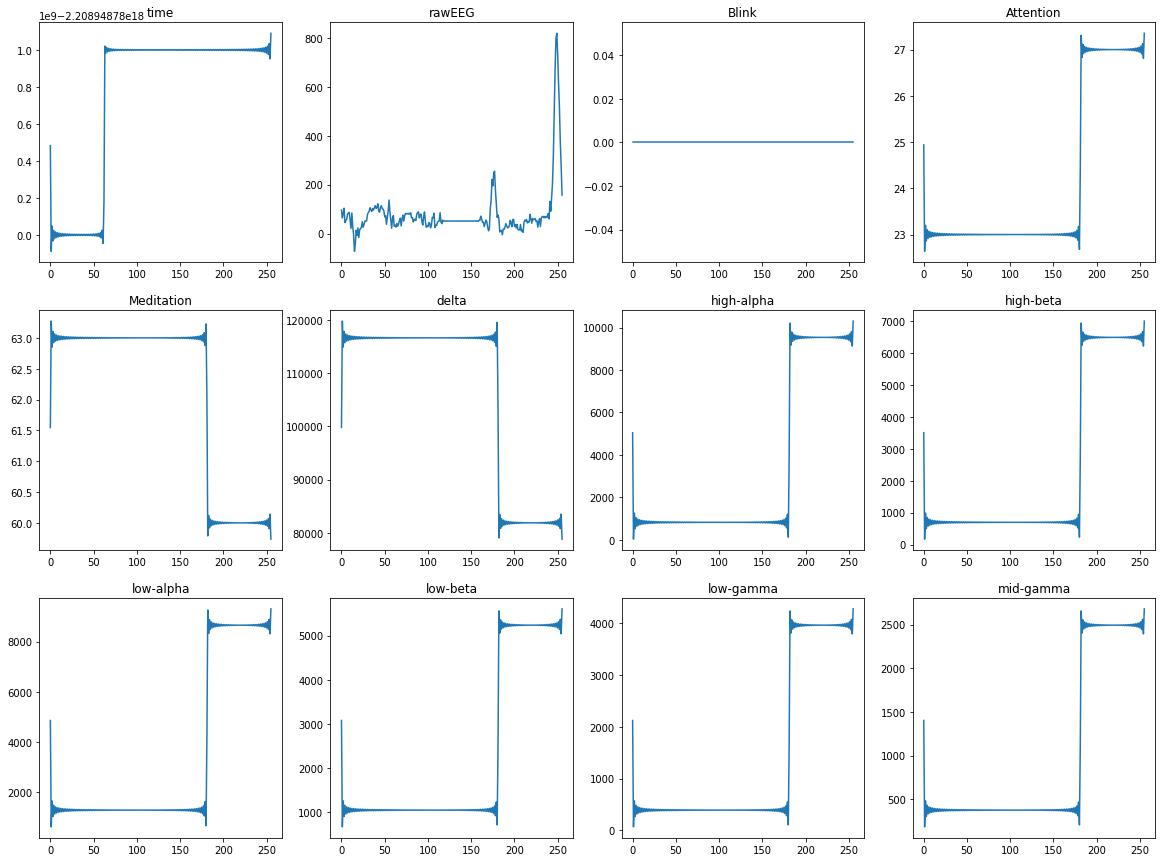

In [ ]:
fig, ax = plt.subplots(4,4, figsize=(20, 15))

cols_mat = filt_data[0].columns
cols_iterator = 0

for i in range(3):
  for j in range(4):
    ax[i,j].plot(filt_data[0][cols_mat[cols_iterator]])
    ax[i,j].set_title(cols_mat[cols_iterator])
    cols_iterator+=1 

In [ ]:
    #Convert all the features into a dataframe          
    df_freq_feat = pd.DataFrame(max_v) #-> já tem all columns with title
    df_IMF_feat = pd.DataFrame(IMF_feat) 
    df_stat_ent_fract_feat = pd.DataFrame(stat_ent_fract_feat)

      
    #Join all features
    df_feat_total = pd.merge(df_freq_feat, df_IMF_feat, left_index=True, right_index=True)
    df_feat_total = pd.merge(df_feat_total, df_stat_ent_fract_feat, left_index=True, right_index=True)


In [ ]:
len(df_feat_total.columns )

380

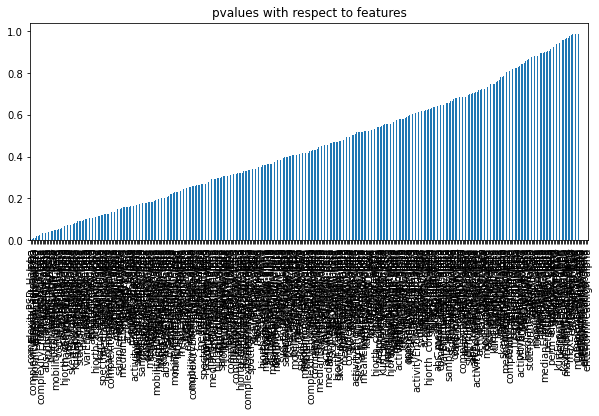

In [ ]:
    # Split-out validation dataset
    X = df_feat_total
    Y = label

    #Feature Selection with ANOVA F-Test
    sel = f_classif(X, Y)
    p_values = pd.Series(sel[1], index=X.columns)
    p_values.sort_values(ascending = True, inplace = True)
    p_values.plot.bar(figsize = (10, 4))
    plt.title('pvalues with respect to features')
    plt.show()

    #Select only the features with <0.05
    p_values_sel = p_values[p_values<0.05]
    if p_values_sel.empty:
        p_values_sel = p_values[p_values<0.15]

    p_col = list(p_values_sel.index)
    p_col = list(p_values_sel.index)    
    X_temp = pd.DataFrame(columns=p_col)
    for col in list(p_values_sel.index):
        X_temp[col] = X[col][:]

    X = X_temp
        
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=9)#3

    # Standardize features
    sc = StandardScaler()
    X_train_stand = sc.fit_transform(X_train)
    X_test_stand = sc.transform(X_validation)

    # Normalize features
    X_train_norm = preprocessing.normalize(X_train, axis=0)
    X_test_norm = preprocessing.normalize(X_validation, axis=0)

# our touch

In [ ]:
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

### approach 0

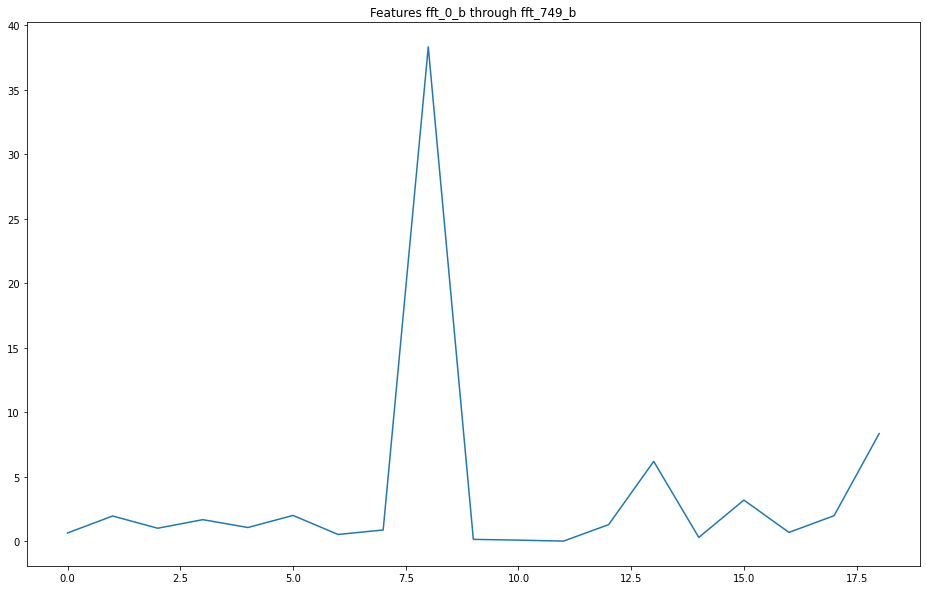

In [ ]:
sample = X_train.loc[0]

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [ ]:
# for making label better 

label_mapping = {'Front':0, 'Stop':3, 'Right':1, 'Left':2 }

y_train = []

for l in Y_train:
  y_train.append(l[0])

y_train = pd.DataFrame(y_train)

y_test = []

for l in Y_validation:
  y_test.append(l[0])

y_test = pd.DataFrame(y_test)

X_test = X_validation

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((114, 19), (29, 19), (114, 1), (29, 1))

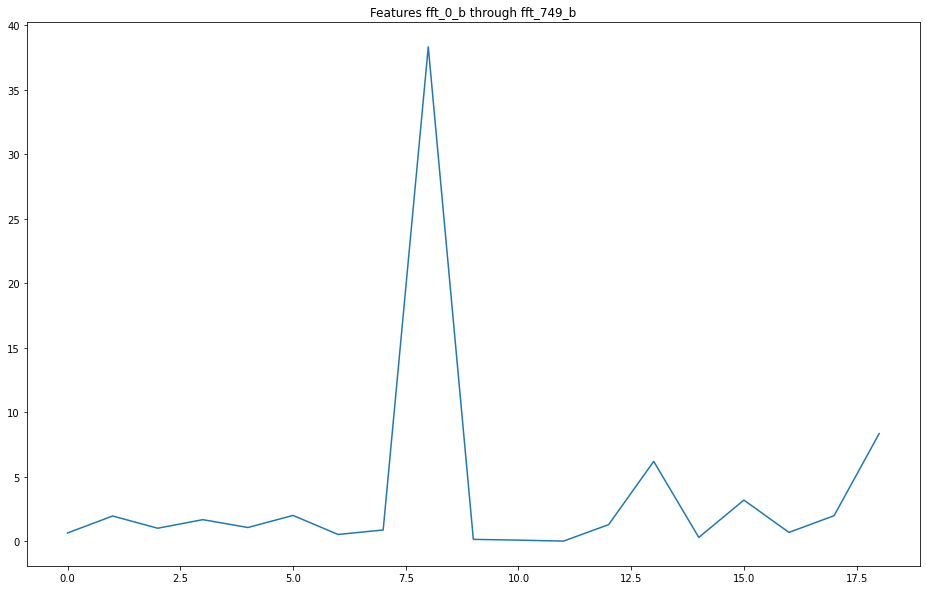

In [ ]:
sample = X_train.loc[0]

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [ ]:
y_train.value_counts()

Left     35
Stop     31
Front    25
Right    23
dtype: int64

In [ ]:
y_train = y_train.replace(label_mapping)
y_test = y_test.replace(label_mapping)

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(4, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 19, 1)            0         
                                                                 
 gru (GRU)                   (None, 19, 256)           198912    
                                                                 
 flatten (Flatten)           (None, 4864)              0         
                                                                 
 dense (Dense)               (None, 4)                 19460     
                                                                 
Total params: 218,372
Trainable params: 218,372
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=1,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
91/91 [==============================] - 4s 21ms/step - loss: 1.5923 - accuracy: 0.2527 - val_loss: 1.8560 - val_accuracy: 0.2174
Epoch 2/50
91/91 [==============================] - 1s 15ms/step - loss: 1.4190 - accuracy: 0.3297 - val_loss: 1.5570 - val_accuracy: 0.2609
Epoch 3/50
91/91 [==============================] - 1s 15ms/step - loss: 1.3638 - accuracy: 0.4176 - val_loss: 1.4402 - val_accuracy: 0.3043
Epoch 4/50
91/91 [==============================] - 1s 15ms/step - loss: 1.3185 - accuracy: 0.3297 - val_loss: 1.5577 - val_accuracy: 0.2609
Epoch 5/50
91/91 [==============================] - 1s 15ms/step - loss: 1.3677 - accuracy: 0.2967 - val_loss: 1.4783 - val_accuracy: 0.1739
Epoch 6/50
91/91 [==============================] - 1s 15ms/step - loss: 1.3295 - accuracy: 0.3736 - val_loss: 1.5927 - val_accuracy: 0.2174
Epoch 7/50
91/91 [==============================] - 1s 15ms/step - loss: 1.3345 - accuracy: 0.3297 - val_loss: 1.4359 - val_accuracy: 0.1739
Epoch 8/50
91

In [ ]:


model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))



Test Accuracy: 27.586%


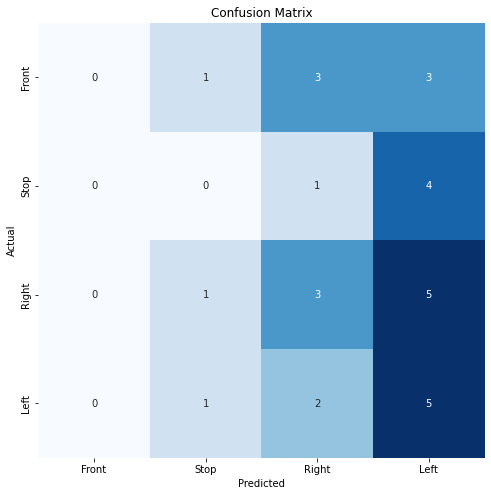

Classification Report:
----------------------
               precision    recall  f1-score   support

       Front       0.00      0.00      0.00         7
        Stop       0.00      0.00      0.00         5
       Right       0.33      0.33      0.33         9
        Left       0.29      0.62      0.40         8

    accuracy                           0.28        29
   macro avg       0.16      0.24      0.18        29
weighted avg       0.18      0.28      0.21        29



In [ ]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, label_mapping.keys())
plt.yticks(np.arange(4) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

### approach 1

In [ ]:
len(Y)

143

In [ ]:
df_feat_total.shape, len(label)

((143, 380), 143)

In [ ]:
y_whole = []

for l in label:
  y_whole.append(l[0])

y_whole = pd.DataFrame(y_whole)

In [ ]:
y_whole

,0
0,Left
1,Left
2,Left
3,Left
4,Left
...,...
138,Stop
139,Stop
140,Stop
141,Stop


In [ ]:
df_feat_total['label'] = y_whole

In [ ]:
df_feat_total.head()

,maxPSD_Raw,meanPSD_Raw,stdPSD_Raw,varPSD_Raw,minPSD_Raw,medianPSD_Raw,skewPSD_Raw,entPSD_Raw,kurtPSD_Raw,activityPSD_Raw,...,skewlow-alpha,mean_featlow-beta,std_featlow-beta,abs_mean_featlow-beta,kurtosis_featlow-beta,hjorth_activitylow-beta,hjorth_complexitylow-beta,hjorth_mobilitylow-beta,skewlow-beta,label
0,0.000592,0.000044,0.000093,8.732033e-09,1.331167e-15,0.000007,3.562240,3.610602,14.470615,1.061798e-08,...,-0.119844,0.513602,0.143818,0.101750,1.286593,0.284471,0.191741,3.816176,0.009249,Left
1,0.000433,0.000051,0.000079,6.280127e-09,2.081585e-16,0.000018,2.630098,3.976486,8.042007,8.826585e-09,...,-0.006405,0.497058,0.116453,0.066784,6.984063,0.260628,0.167130,4.451029,-0.005045,Left
2,0.003081,0.000220,0.000562,3.186199e-07,7.926251e-16,0.000012,3.164649,3.167688,9.596287,3.645235e-07,...,-0.126127,0.506220,0.116544,0.077713,4.417449,0.269842,0.148936,4.591805,-0.005326,Left
3,0.002870,0.000330,0.000520,2.725460e-07,1.829176e-15,0.000112,2.561187,3.953481,7.270618,3.796105e-07,...,0.022194,0.494400,0.188879,0.145843,0.119035,0.280107,0.264162,2.885396,0.010662,Left
4,0.025860,0.000832,0.003397,1.163054e-05,3.624365e-16,0.000012,5.217829,2.352693,28.892689,1.223231e-05,...,0.004288,0.490774,0.165768,0.128090,0.379419,0.268338,0.227719,3.208794,0.002642,Left


In [ ]:
label_mapping = {'Front':0, 'Stop':3, 'Right':1, 'Left':2 }

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(df_feat_total)

In [ ]:
X_train

,maxPSD_Raw,meanPSD_Raw,stdPSD_Raw,varPSD_Raw,minPSD_Raw,medianPSD_Raw,skewPSD_Raw,entPSD_Raw,kurtPSD_Raw,activityPSD_Raw,...,hjorth_mobilitylow-alpha,skewlow-alpha,mean_featlow-beta,std_featlow-beta,abs_mean_featlow-beta,kurtosis_featlow-beta,hjorth_activitylow-beta,hjorth_complexitylow-beta,hjorth_mobilitylow-beta,skewlow-beta
118,0.003881,0.000352,0.000638,4.105835e-07,2.521664e-16,0.000086,3.083594,3.806292,10.791367,5.314828e-07,...,2.165938,0.004318,0.505025,0.181124,0.143453,-0.135719,0.287856,0.233236,3.046125,0.014455
108,0.005873,0.000360,0.001020,1.048474e-06,1.443976e-17,0.000010,3.561323,2.994014,12.509513,1.170122e-06,...,3.564070,-0.011760,0.496831,0.108231,0.062592,7.897952,0.258555,0.144937,4.825285,-0.000893
90,0.008967,0.000625,0.001577,2.505231e-06,2.415925e-17,0.000034,3.437803,3.220726,12.464885,2.876552e-06,...,3.305943,-0.005656,0.494357,0.120071,0.069211,5.785259,0.258806,0.173348,4.290052,-0.002597
74,0.006960,0.000381,0.000989,9.852307e-07,1.553635e-16,0.000044,4.550686,3.340929,23.553738,1.122928e-06,...,3.324841,0.013546,0.474652,0.116174,0.071187,4.935072,0.238791,0.175668,4.375509,-0.009607
112,0.000744,0.000031,0.000102,1.057803e-08,6.469546e-16,0.000004,5.337802,3.082843,29.520435,1.147509e-08,...,3.140830,0.007661,0.479467,0.097969,0.046904,11.445967,0.239487,0.146135,5.099283,0.008211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.006051,0.000249,0.000890,7.987020e-07,1.626277e-17,0.000008,4.794672,2.680573,23.986066,8.545719e-07,...,3.318191,0.013376,0.488891,0.104053,0.058093,9.128939,0.249841,0.145392,4.934843,-0.000274
98,0.002067,0.000115,0.000348,1.219715e-07,6.394270e-16,0.000009,4.133632,2.989628,17.093234,1.342061e-07,...,3.467880,-0.032442,0.499376,0.096503,0.063807,7.407420,0.258689,0.136511,5.404685,0.002750
66,0.002546,0.000118,0.000343,1.184667e-07,5.326799e-18,0.000009,4.671185,3.135034,24.246901,1.313857e-07,...,3.183484,-0.008654,0.519943,0.123320,0.073827,4.238699,0.285549,0.159719,4.432965,-0.005504
126,0.000752,0.000031,0.000101,1.028116e-08,1.815290e-16,0.000003,5.165321,3.029112,28.276751,1.116413e-08,...,3.295069,-0.013592,0.475290,0.113943,0.059199,6.559450,0.238883,0.164992,4.408517,-0.019285


In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.GRU(16, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(4, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 380)]             0         
                                                                 
 tf.expand_dims_1 (TFOpLambd  (None, 380, 1)           0         
 a)                                                              
                                                                 
 gru_1 (GRU)                 (None, 380, 16)           912       
                                                                 
 flatten_1 (Flatten)         (None, 6080)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 24324     
                                                                 
Total params: 25,236
Trainable params: 25,236
Non-trainable params: 0
_______________________________________________________

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=1,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
80/80 [==============================] - 8s 80ms/step - loss: 2.0826 - accuracy: 0.2625 - val_loss: 1.5962 - val_accuracy: 0.3000
Epoch 2/50
80/80 [==============================] - 6s 69ms/step - loss: 2.0240 - accuracy: 0.2375 - val_loss: 2.7294 - val_accuracy: 0.1500
Epoch 3/50
80/80 [==============================] - 8s 107ms/step - loss: 1.5360 - accuracy: 0.2875 - val_loss: 1.8263 - val_accuracy: 0.1000
Epoch 4/50
80/80 [==============================] - 6s 69ms/step - loss: 1.4582 - accuracy: 0.3000 - val_loss: 1.8167 - val_accuracy: 0.1500
Epoch 5/50
80/80 [==============================] - 6s 69ms/step - loss: 1.4527 - accuracy: 0.3375 - val_loss: 1.3723 - val_accuracy: 0.2000
Epoch 6/50
80/80 [==============================] - 6s 69ms/step - loss: 1.3711 - accuracy: 0.3375 - val_loss: 1.3531 - val_accuracy: 0.3500
Epoch 7/50
80/80 [==============================] - 5s 68ms/step - loss: 1.3568 - accuracy: 0.4000 - val_loss: 1.3174 - val_accuracy: 0.1500
Epoch 8/50
8

In [ ]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 23.256%


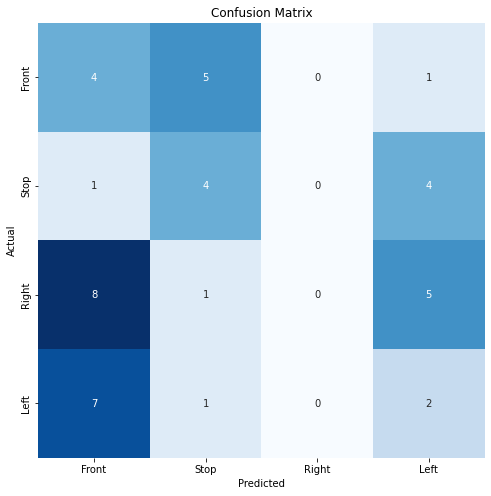

Classification Report:
----------------------
               precision    recall  f1-score   support

       Front       0.20      0.40      0.27        10
        Stop       0.36      0.44      0.40         9
       Right       0.00      0.00      0.00        14
        Left       0.17      0.20      0.18        10

    accuracy                           0.23        43
   macro avg       0.18      0.26      0.21        43
weighted avg       0.16      0.23      0.19        43



In [ ]:


y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, label_mapping.keys())
plt.yticks(np.arange(4) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)



### approach 2 

In [ ]:
    # Hyperparameter Optimization
    print('\n Hyperparameter Optimization\n')
    
    # Make predictions on validation dataset
    models = {'GaussianNB' : GaussianNB(), 
              'SVM' : SVC(kernel='rbf', decision_function_shape='ovo'),  # 'ovo' - one-vs-one
              'DTC' : DecisionTreeClassifier(), 
              'RF' : RandomForestClassifier(), #non-linear
              'KNN' : KNeighborsClassifier(), 
              'LR' : LogisticRegression(solver='liblinear', multi_class='ovr'),# ovr - one-vs-rest strategy
              'LDA' : LinearDiscriminantAnalysis(solver='eigen'),
              'LSVM' : LinearSVC(tol=1e-05),
              'MLP': MLPClassifier()#solver='lbfgs', hidden_layer_sizes=(5, 2))
              }
    # defining parameter range
    param_grid = {'GaussianNB' : {}, 
              'SVM' : {'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},  
              'DTC' : { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}, 
              'RF' : {'n_estimators': [200, 700],'max_features': ['auto', 'sqrt', 'log2']}, 
              'KNN' : {'n_neighbors':[2],'leaf_size':[1,3,5],'algorithm':['auto', 'kd_tree'],'n_jobs':[-1]} , 
              'LR' : {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]},
              'LDA' : {'solver' : ['svd'], 'tol' : [0.00001, 0.0001,0.0002,0.0003]},
              'LSVM' : {},
              'MLP': {'activation': ['tanh', 'relu'],'solver': ['lbfgs', 'sgd', 'adam'],'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive']},
              }
    
    modelsKey= list(models.keys())
    #N componenets depend of the lenght of p_values_sel
    if len(p_values_sel)>=3:
        n_comp=3
    else:
        n_comp=len(p_values_sel)
        
    pca = PCA(n_components=n_comp)
    k = 0
    results = np.zeros((len(models)*3, 3), dtype='object')
    dict_results = {} #dictionary with all results per user
    for m in range(len(modelsKey)):
        model_p = models[modelsKey[m]]
        #Hyperparameter Optimization
        param = param_grid[modelsKey[m]]
        if param == {}:
            model = model_p
    
        else:
            grid = GridSearchCV(model_p, param, cv=grid_CV)
            model = grid
        
        ##Normal Data
        X_train_n = pca.fit_transform(X_train)
        X_test_n = pca.transform(X_validation)
        model.fit(X_train_n,  Y_train)
        predictions = model.predict(X_test_n)
            
        ##Standardize features
        X_train_stand_pca = pca.fit_transform(X_train_stand)
        X_test_stand_pca = pca.transform(X_test_stand)
        model.fit(X_train_stand_pca,  Y_train)
        predictions_stand = model.predict(X_test_stand_pca)
            
        ##Normalize features
        X_train_norm_pca = pca.fit_transform(X_train_norm)
        X_test_norm_pca = pca.transform(X_test_norm)
        model.fit(X_train_norm_pca,  Y_train)
        predictions_norm = model.predict(X_test_norm_pca)     
        
        print(modelsKey[m])
        print('F1 Score         ', f1_score(Y_validation, predictions, average='weighted'))
        print('F1 Score (norm)  ', f1_score(Y_validation, predictions_norm, average='weighted'))
        print('F1 Score (stand) ', f1_score(Y_validation, predictions_stand, average='weighted'))
        
        dict_results.update({modelsKey[m]+'_or': f1_score(Y_validation, predictions, average='weighted'), 
                        modelsKey[m]+'_stand': f1_score(Y_validation, predictions_stand, average='weighted'), 
                        modelsKey[m]+'_norm': f1_score(Y_validation, predictions_norm, average='weighted')})
        
        #Save the f1-score of the different models 
        results[m+k,0] = modelsKey[m] 
        results[m+1+k,0] = modelsKey[m]
        results[m+2+k,0] = modelsKey[m] 
            
        results[m+k,1] = f1_score(Y_validation, predictions, average='weighted')
        results[m+1+k,1] = f1_score(Y_validation, predictions_norm, average='weighted')
        results[m+2+k,1] = f1_score(Y_validation, predictions_stand, average='weighted')
    
        results[m+k,2] = 'or'
        results[m+1+k,2] = 'norm'
        results[m+2+k,2] = 'stand'
        
        k = k+2
       
    #Save the results of each user in a dataframe
    df_results = df_results.append(dict_results, ignore_index=True)
    
    # Save the model with the best performance
    results_sort = sorted(results,key=lambda x:x[1])
    results_sort = np.array(results_sort, dtype='<U2000')
    

    #Number of models to save 
    n_models = 2
    estimator = []
    model_best_params={}
    
    print('\nBest model ')
    print(results_sort[len(results_sort)-1,0], results_sort[len(results_sort)-1,1])
    print(results_sort[len(results_sort)-2,0], results_sort[len(results_sort)-2,1], ' \n')
    
print(start_time)
print((datetime.datetime.now()).time())
print('Epoch Time: ', epoch_time, '    Dataset - ', dataset)


 Hyperparameter Optimization



ValueError: ignored

## Section 2: Model for all users(Data set A - C) 



In [ ]:
# Dataset Files
dataset = '/content/drive/MyDrive/IW2_LIACC/IW_NeuroSky/DatasetA'

#Seconds per epoch
epoch_time = 3
grid_CV = 5

#Count the number of files of the Dataset
path, dirs, files = next(os.walk(dataset))

#Remove the Labels file from the list
files.remove('Labels.csv')
dirs_count = len(dirs)

label_file = read_csv(dataset +'/Labels.csv')
#Sort files in ascending order
dirs.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

# Create the pandas DataFrame for results
keys_results = ['GaussianNB_or','GaussianNB_stand','GaussianNB_norm', 'SVM_or','SVM_stand','SVM_norm','DTC_or','DTC_stand','DTC_norm','RF_or','RF_stand','RF_norm','KNN_or','KNN_stand','KNN_norm','LR_or','LR_stand','LR_norm','LDA_or','LDA_stand','LDA_norm','LSVM_or','LSVM_stand','LSVM_norm','MLP_or','MLP_stand','MLP_norm']
df_results = pd.DataFrame(columns = keys_results)

data_t = []
label = []
   
print('[INFO] Reading the Data...')
start_time = (datetime.datetime.now()).time()
for i_folder in range(dirs_count):
    print(i_folder,'/', dirs_count)

    try:
        path_user, dirs_user, files_user = next(os.walk(dataset+'/'+dirs[i_folder]))
        #Sort files in ascending order
        files_user.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

        for f_user in range(len(files_user)): 
            data = pd.read_csv(dataset +'/'+dirs[i_folder]+'/'+ str(files_user[f_user]))
            
            #Convert time column to time format 
            data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S')
            
            ti = data['time'][0]
            tf = data['time'][len(data['time'])-1]
            delta_time = (tf - ti).total_seconds()
            
            n_epochs = floor(delta_time/epoch_time) #number of epochs
            ind_label = label_file[label_file['File']==files_user[f_user]].index.values
            l = list(label_file['Label'][ind_label])
            
            #Split data per epoch
            for t in range(n_epochs):                     
                if t == n_epochs-1:
                    data_t.append(data) #append the last epoch 
                    label.append(l)
                else: 
                    t0=data['time'].iloc[0]
                    data_epoch = data[data['time']<= t0 + datetime.timedelta(0, epoch_time-1)] # epoch_time-1 have the exact time of the epoch, otherwise an extra second would be counted, ex: 45+2 =47 and 47 is the start of the next epoch
                    
                    #Remove this epoch from data
                    data = data.loc[data['time']> t0 + datetime.timedelta(0, epoch_time-1)]
                    label.append(l) #assign label for each epoch
                    data_t.append(data_epoch)    
                    
    except:
        print('An unexpected error occurred')

#delete empty dataframes
data_temp = []
label_temp = []
for rem_v in range(len(data_t)):
    if not data_t[rem_v].empty:
        data_temp.append(data_t[rem_v])
        label_temp.append(label[rem_v])

data_t = data_temp
label = label_temp    

In [ ]:
len(data_t)

In [ ]:
## FEATURE EXTRACTION 
fs = 128 # sampling frequency
#Used for ent/stat/fract features and IMF
waves = ['rawEEG','low-beta', 'high-beta','low-alpha','high-alpha']#, 'low-gamma', 'mid-gamma'] 

filt_data = []

#fre -> PSD feat
PSD_wave = []
freq_feat = []
max_v={}

#EMD
imfT = []
IMF_feat = {}

#Fract/ent/stat
stat_ent_fract_feat = {}

aux_keys = 0
print((datetime.datetime.now()).time())
print('[INFO] Feature Extraction...')
for i_epoch in range(len(data_t)):
    
    data_or = data_t[i_epoch]
    
    #Downsampling
    s = pd.Series(data=pd.to_datetime(data_or['time'], format='%H:%M:%S'))
    oldFS = (data_or.pivot_table(index=['time'], aggfunc='size')).median() #count the number of times each time is repeated and use the median as sampling frequency
    newFS = fs
    data_or['time'] = pd.to_numeric(pd.to_datetime(data_or['time']))
    newNumSamples = int((data_or.shape[0] / oldFS) * newFS)
    newData = pd.DataFrame(resample(data_or, newNumSamples))
    newData.columns = data.columns
    filt_data.append(newData)
    
    data_pre = preprocessing_data_raw(newData, fs, order=5)
    filt_data.append(data_pre)
    
    #Freq Features
    data_freq_feat=frequency_domain_features_norm(data_pre,fs)
    
    k = list(data_freq_feat.keys())
    
    PSD_wave.append([]) #all features in the same index
    for k_i in range(len(k)):
        if k[k_i] != 'f':
            max_PSD_ind = np.argmax(data_freq_feat[k[k_i]])
            f_ind = data_freq_feat['f'][max_PSD_ind]

            param = constant_param(data_freq_feat[k[k_i]])
            lp = list(param.keys())            
            for l in lp:
                key = l+k[k_i]                    
                if key in max_v.keys():
                    max_v[key].append(param[l])                    
                else:
                    max_v.update({key:list([param[l]])})     
    
    ##EMD/ IMF features
    for w in waves:
        x = np.array(data_pre[w]) 
        imfs = emd.sift.sift(x)
        feat_imf = imf_feat(np.transpose(imfs),x)
        imfT.append(feat_imf)
        
        #Calculate the max/mean/std values of the imfs  features
        aux_pre=[]
        k = list(feat_imf.keys())
        for k_i in range(len(k)):
            param = constant_param(feat_imf[k[k_i]])
            p_keys = list(param.keys())
            for l in p_keys:
                key = l+k[k_i]+w
                if key in IMF_feat.keys():
                    IMF_feat[key].append(param[l])                    
                else:
                    IMF_feat.update({key:list([param[l]])}) 
               
    #ent features
    data_ent_feat = entropy_features_norm(data_pre,fs) #5 waves * 5 features
    wave_keys= list(data_ent_feat.keys())
    
    for w_k in wave_keys:
        ent_keys = data_ent_feat[w_k][0].keys()
        for e_k in ent_keys:
            key = e_k + w_k            
            if key in stat_ent_fract_feat.keys():
                stat_ent_fract_feat[key].append(data_ent_feat[w_k][0][e_k])   
            else:
                stat_ent_fract_feat.update({key:list([data_ent_feat[w_k][0][e_k]])})

    #fract features
    data_ent_fract = fractal_features_norm(data_pre) #5 waves * 3 features
    wave_keys= list(data_ent_fract.keys())
    
    for w_k in wave_keys:
        fract_keys = data_ent_fract[w_k][0].keys()
        for f_k in fract_keys:
            key = f_k + w_k            
            if key in stat_ent_fract_feat.keys():
                stat_ent_fract_feat[key].append(data_ent_fract[w_k][0][f_k])   
            else:
                stat_ent_fract_feat.update({key:list([data_ent_fract[w_k][0][f_k]])})
    
    #statistical_features   
    data_ent_fract = statistical_features_norm(data_pre) #5 waves * 7 features
    wave_keys= list(data_ent_fract.keys())    
    for w_k in wave_keys:
        stat_keys = data_ent_fract[w_k][0].keys()
        for s_k in stat_keys:
            key = s_k + w_k            
            if key in stat_ent_fract_feat.keys():#create a new key
                stat_ent_fract_feat[key].append(data_ent_fract[w_k][0][s_k])
            else:#add the value to an existing key
                stat_ent_fract_feat.update({key:list([data_ent_fract[w_k][0][s_k]])})
                    
        
print((datetime.datetime.now()).time())

In [ ]:
#Convert all the features into a dataframe          
df_freq_feat = pd.DataFrame(max_v) #-> já tem all columns with title
df_IMF_feat = pd.DataFrame(IMF_feat) 
df_stat_ent_fract_feat = pd.DataFrame(stat_ent_fract_feat)

#Join all features
df_feat_total = pd.merge(df_freq_feat, df_IMF_feat, left_index=True, right_index=True)
df_feat_total = pd.merge(df_feat_total, df_stat_ent_fract_feat, left_index=True, right_index=True)

# Split-out validation dataset
X = df_feat_total
Y = label

#Feature Selection with ANOVA F-Test
sel = f_classif(X, Y)
p_values = pd.Series(sel[1], index=X.columns)
p_values.sort_values(ascending = True, inplace = True)
p_values.plot.bar(figsize = (10, 4))
plt.title('pvalues with respect to features')
plt.show()

#Select only the features with <0.05
p_values_sel = p_values[p_values<0.05]
if p_values_sel.empty:
    p_values_sel = p_values[p_values<0.15]

p_col = list(p_values_sel.index)
p_col = list(p_values_sel.index)    
X_temp = pd.DataFrame(columns=p_col)
for col in list(p_values_sel.index):
    X_temp[col] = X[col][:]

X = X_temp
    
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=9)#3

# Standardize features
sc = StandardScaler()
X_train_stand = sc.fit_transform(X_train)
X_test_stand = sc.transform(X_validation)

# Normalize features
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_validation)

In [ ]:
df_feat_total.shape

In [ ]:
# Hyperparameter Optimization
print('\n Hyperparameter Optimization\n')

# Make predictions on validation dataset
models = {'GaussianNB' : GaussianNB(), 
          'SVM' : SVC(kernel='rbf', decision_function_shape='ovo'),  # 'ovo' - one-vs-one
          'DTC' : DecisionTreeClassifier(), 
          'RF' : RandomForestClassifier(), #non-linear
          'KNN' : KNeighborsClassifier(), 
          'LR' : LogisticRegression(solver='liblinear', multi_class='ovr'),# ovr - one-vs-rest strategy
          'LDA' : LinearDiscriminantAnalysis(solver='eigen'),
          'LSVM' : LinearSVC(tol=1e-05),
          'MLP': MLPClassifier()#solver='lbfgs', hidden_layer_sizes=(5, 2))
          }
# defining parameter range
param_grid = {'GaussianNB' : {}, 
          'SVM' : {'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},  
          'DTC' : { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}, 
          'RF' : {'n_estimators': [200, 700],'max_features': ['auto', 'sqrt', 'log2']}, 
          'KNN' : {'n_neighbors':[4,5,6,7],'leaf_size':[1,3,5],'algorithm':['auto', 'kd_tree'],'n_jobs':[-1]} , 
          'LR' : {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]},
          'LDA' : {'solver' : ['svd'], 'tol' : [0.00001, 0.0001,0.0002,0.0003]},
          'LSVM' : {},
          'MLP': {'activation': ['tanh', 'relu'],'solver': ['lbfgs', 'sgd', 'adam'],'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive']},
          }

modelsKey= list(models.keys())
#N componenets depend on the lenght of p_values_sel
if len(p_values_sel)>=3:
    n_comp=3
else:
    n_comp=len(p_values_sel)
    
pca = PCA(n_components=n_comp)
k = 0
results = np.zeros((len(models)*3, 3), dtype='object')
dict_results = {} #dictionary with all results per user
for m in range(len(modelsKey)):
    model_p = models[modelsKey[m]]
    #Hyperparameter Optimization
    param = param_grid[modelsKey[m]]
    if param == {}:
        model = model_p

    else:
        grid = GridSearchCV(model_p, param, cv=grid_CV)
        model = grid
    
    ##Normal Data
    X_train_n = pca.fit_transform(X_train)
    X_test_n = pca.transform(X_validation)
    model.fit(X_train_n,  Y_train)
    predictions = model.predict(X_test_n)
        
    ##Standardize features
    X_train_stand_pca = pca.fit_transform(X_train_stand)
    X_test_stand_pca = pca.transform(X_test_stand)
    model.fit(X_train_stand_pca,  Y_train)
    predictions_stand = model.predict(X_test_stand_pca)
        
    ##Normalize features
    X_train_norm_pca = pca.fit_transform(X_train_norm)
    X_test_norm_pca = pca.transform(X_test_norm)
    model.fit(X_train_norm_pca,  Y_train)
    predictions_norm = model.predict(X_test_norm_pca)     
    
    print(modelsKey[m])
    print('F1 Score         ', f1_score(Y_validation, predictions, average='weighted'))
    print('F1 Score (norm)  ', f1_score(Y_validation, predictions_norm, average='weighted'))
    print('F1 Score (stand) ', f1_score(Y_validation, predictions_stand, average='weighted'))
    
    dict_results.update({modelsKey[m]+'_or': f1_score(Y_validation, predictions, average='weighted'), 
                    modelsKey[m]+'_stand': f1_score(Y_validation, predictions_stand, average='weighted'), 
                    modelsKey[m]+'_norm': f1_score(Y_validation, predictions_norm, average='weighted')})
    
    #Save the f1-score of the different models 
    results[m+k,0] = modelsKey[m] 
    results[m+1+k,0] = modelsKey[m]
    results[m+2+k,0] = modelsKey[m] 
        
    results[m+k,1] = f1_score(Y_validation, predictions, average='weighted')
    results[m+1+k,1] = f1_score(Y_validation, predictions_norm, average='weighted')
    results[m+2+k,1] = f1_score(Y_validation, predictions_stand, average='weighted')

    results[m+k,2] = 'or'
    results[m+1+k,2] = 'norm'
    results[m+2+k,2] = 'stand'
    
    k = k+2
   
#Save the results of each user in a dataframe
df_results = df_results.append(dict_results, ignore_index=True)

# Save the model with the best performance
results_sort = sorted(results,key=lambda x:x[1])
results_sort = np.array(results_sort, dtype='<U2000')

#Number of models to save 
n_models = 2
best_estimator = []
best_model_params={}

print('\nBest models ')
print(results_sort[len(results_sort)-1,0], results_sort[len(results_sort)-1,1])
print(results_sort[len(results_sort)-2,0], results_sort[len(results_sort)-2,1], ' \n')

for i in range(n_models):
#run the 2 best models again
    key = results_sort[len(results_sort)-(i+1),0]
    data_type = results_sort[len(results_sort)-(i+1),2]
    param = param_grid[key]
    model_p = models[key]    
    
    if param == {}:
        model = model_p
    
    else:
        grid = GridSearchCV(model_p, param, cv=grid_CV)
        model = grid
            
        
    if data_type == 'or':
        model.fit(X_train_n,  Y_train)
        predictions = model.predict(X_test_n)
    elif data_type =='norm':
        model.fit(X_train_norm_pca,  Y_train)
        predictions = model.predict(X_test_norm_pca)
    elif data_type =='stand':
        model.fit(X_train_stand_pca,  Y_train)
        predictions = model.predict(X_test_stand_pca)
    
    #Save the best parameters
    if param != {}:
        best_model_params.update({key: [model.best_params_, data_type]})
    best_estimator.append(model)

    print(str(i+1), key, f1_score(Y_validation, predictions, average='weighted'))

print('\nWorst models')
print(results_sort[0,0], results_sort[0,1])
print(results_sort[1,0], results_sort[1,1], ' \n')
worst_estimator = []
worst_model_params = {}

for i in range(n_models):
#run the 2 best models again
    key = results_sort[i,0]
    data_type = results_sort[i,2]
    param = param_grid[key]
    model_p = models[key]    
    
    if param == {}:
        model = model_p
    
    else:
        grid = GridSearchCV(model_p, param, cv=grid_CV)
        model = grid
        
    if data_type == 'or':
        model.fit(X_train_n,  Y_train)
        predictions = model.predict(X_test_n)
    elif data_type =='norm':
        model.fit(X_train_norm_pca,  Y_train)
        predictions = model.predict(X_test_norm_pca)
    elif data_type =='stand':
        model.fit(X_train_stand_pca,  Y_train)
        predictions = model.predict(X_test_stand_pca)
        
    #Save the parameters for the worts models
    if param != {}:
        worst_model_params.update({key: [model.best_params_, data_type]})
    worst_estimator.append(model)
    print(str(i+1), key, f1_score(Y_validation, predictions, average='weighted'))


print(start_time)
print((datetime.datetime.now()).time())
print('Epoch Time: ', epoch_time, '    Dataset - ', dataset)

## Section 3: Confusion matrix of the models

In [ ]:
model = LinearDiscriminantAnalysis(solver= 'svd', tol = 1e-05)
t = 'Confusion matrix - ' + 'LDA'

#X_train = X_train_n
#X_test =X_test_n 

#X_train = X_train_stand_pca 
#X_test = X_test_stand_pca

X_train = X_train_norm_pca
X_test = X_test_norm_pca

Y_train = Y_train
y_test = Y_validation
class_names = ['Front','Left','Right', 'Stop']

model.fit(X_train,  Y_train)
predictions = model.predict(X_test)

print('\nResult', f1_score(y_test, predictions, average='weighted'))
c_matrix = confusion_matrix(y_test, predictions)

#plt.imshow(cm, cmap = 'binary')
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrix, classes=class_names,title=t)

## Section 4: Voting Classifier with best models and parameters

In [ ]:
models1 = [('RF' ,RandomForestClassifier(max_features= 'log2', n_estimators = 200) ),
           ('GNB',GaussianNB() )  
        ]

t1 = 'Confusion matrix - ' + 'RF '+'+ GNB'

X_train = X_train_n
X_test =X_test_n 

#X_train = X_train_stand_pca 
#X_test = X_test_stand_pca

#X_train = X_train_norm_pca
#X_test = X_test_norm_pca

Y_train = Y_train
y_test = Y_validation
 
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = models1, voting ='hard')
vot_hard.fit(X_train,  Y_train)
y_pred = vot_hard.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(Y_validation, y_pred)
print("Hard Voting Score " , score)
print("Hard F1 Score " , f1_score(Y_validation, y_pred, average='weighted'))

c_matrix = confusion_matrix(y_test, y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrix, classes=['Front','Left','Right', 'Stop'],title='Hard Voting: ' + t1)

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = models1, voting ='soft')
vot_soft.fit(X_train,  Y_train)
y_pred = vot_soft.predict(X_test)
  
# using accuracy_score
score = accuracy_score(Y_validation, y_pred)
print("Soft Voting Score " , score) 
print("Soft F1 Score " , f1_score(Y_validation, y_pred, average='weighted'))

c_matrix = confusion_matrix(y_test, y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrix, classes=['Front','Left','Right', 'Stop'],title='Soft Voting: ' + t1)

##  Section 5: AdaBoost Classifier with best models and parameters

In [ ]:
t1 = 'AdaBoostClassifier: Confusion matrix - ' + 'GNB '

model_estimator = GaussianNB()

X_train = X_train_n
X_test =X_test_n 

#X_train = X_train_stand_pca 
#X_test = X_test_stand_pca

#X_train = X_train_norm_pca
#X_test = X_test_norm_pca

Y_train = Y_train
y_test = Y_validation

num_estimators = [5, 10, 20, 40, 60]

for i in num_estimators:
    abc = AdaBoostClassifier(n_estimators=i, base_estimator=model_estimator, random_state=12) #the base estimator is DecisionTreeClassifier
    # Train Adaboost Classifer
    model = abc.fit(X_train,  Y_train)
    #Predict the response for test dataset
    y_pred = model.predict(X_test)
    
    print("\nAdaBoost - {} estimators:".format(i))
    print("Accuracy Score " , accuracy_score(Y_validation, y_pred))
    print("F1 Score " , f1_score(Y_validation, y_pred, average='weighted'))

n_estim = 5
# NOTE: if DTC is not the best classifier use this:
#svc=SVC(probability=True, kernel='linear') or other
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=n_estim, base_estimator=model_estimator, random_state=12)

# Train Adaboost Classifer
model = abc.fit(X_train,  Y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

print("\nAdaBoost ")
print("Accuracy Score " , accuracy_score(Y_validation, y_pred))
print("F1 Score " , f1_score(Y_validation, y_pred, average='weighted'))
c_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrix, classes=['Front','Left','Right', 'Stop'],title=t1)

## Section 6: Model for all users (Data set D - path)


In [ ]:
# Dataset Files
dataset = '/content/drive/MyDrive/IW2_LIACC/IW_NeuroSky/DatasetD'
datasetLabels = '/content/drive/MyDrive/IW2_LIACC/IW_NeuroSky/DatasetD_Labels'

#Seconds per epoch
epoch_time = 2
grid_CV=5

#Count the number of files of the Dataset
path, dirs, files = next(os.walk(dataset))
pathLabels, dirsLabels, filesLabels = next(os.walk(datasetLabels))

#Remove the Labels file from the list
dirs_count = len(dirs)

#Sort files in ascending order
dirs.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])
dirsLabels.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

# Create the pandas DataFrame for results
keys_results = ['GaussianNB_or','GaussianNB_stand','GaussianNB_norm', 'SVM_or','SVM_stand','SVM_norm','DTC_or','DTC_stand','DTC_norm','RF_or','RF_stand','RF_norm','KNN_or','KNN_stand','KNN_norm','LR_or','LR_stand','LR_norm','LDA_or','LDA_stand','LDA_norm','LSVM_or','LSVM_stand','LSVM_norm','MLP_or','MLP_stand','MLP_norm']
df_results = pd.DataFrame(columns = keys_results)

data_t = []
labels_t = []

print('[INFO] Reading the Data...')
start_time = (datetime.datetime.now()).time()
print((datetime.datetime.now()).time())
for i_folder in range(dirs_count):
    print(i_folder,'/', dirs_count)
    try:
        path_user, dirs_user, files_user = next(os.walk(dataset+'/'+dirs[i_folder]))
        pathLabels_user, dirsLabels_user, filesLabels_user = next(os.walk(datasetLabels+'/'+dirsLabels[i_folder]))
        
        #Sort files in ascending order
        files_user.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])
        filesLabels_user.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])
    
        for f_user in range(len(files_user)): 
            data = pd.read_csv(dataset  +'/'+dirs[i_folder]+'/'+ str(files_user[f_user])) 
            label_file = pd.read_excel(datasetLabels +'/' +dirsLabels[i_folder]+'/'+ str(filesLabels_user[f_user]))
            
            for lf in range(len(label_file)):
                #Split data per each label
                if lf !=len(label_file)-1:
                    search1 = str(label_file['Start'][lf])
                    search2 = str(label_file['Start'][lf+1])
                    
                    df1 = data.loc[data.isin([search1]).any(axis=1)]
                    df2 = data.loc[data.isin([search2]).any(axis=1)]
                    
                    ind_time1 = df1.index.values.tolist()
                    ind_time2 = df2.index.values.tolist()
                    
                    data_epoch = data[ind_time1[0]:ind_time2[0]-1] #do not include the value of the new label, as this is the start time of the next label
                    
                else:# lf ==len(label_file):
                    search1 = str(label_file['Start'][lf])
                    df1 = data.loc[data.isin([search1]).any(axis=1)]
                    ind_time1 = df1.index.values.tolist()
                    
                    data_epoch = data[ind_time1[0]:len(data)] #do not include the value of the new label, as this is the start time of the next label
    
                data_t.append(data_epoch)  
                labels_t.append(label_file['Label'][lf])

    except:
        print('An unexpected error occurred')
#Remove empty epochs
data_temp = []
label_temp = []
for rem_v in range(len(data_t)):
    if not data_t[rem_v].empty:
        data_temp.append(data_t[rem_v])
        label_temp.append(labels_t[rem_v])

data_t = data_temp
label_t = label_temp

print((datetime.datetime.now()).time())   

In [ ]:
print('[Info]Epoch division...')    
dataT = []
label = []  
for f_epoch in range(len(data_t)): 
   
    data = data_t[f_epoch]
    
    #Convert time column to time format 
    data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S')
    
    ti = data['time'].iloc[0]
    tf = data['time'].iloc[-1] #last value #data['time'][len(data['time'])-1]
    delta_time = (tf - ti).total_seconds()
    
    n_epochs = floor(delta_time/epoch_time) #number of epochs
    #l = list(labels_t[f_epoch])
    l = labels_t[f_epoch]
    
    #Split data per epoch
    for t in range(n_epochs):                     
        if t == n_epochs-1:
            dataT.append(data) #append the last epoch 
            label.append(l)
        else: 
            t0=data['time'].iloc[0]
            data_epoch = data[data['time']<= t0 + datetime.timedelta(0, epoch_time-1)] # epoch_time-1 have the exact time of the epoch, otherwise an extra second would be counted, ex: 45+2 =47 and 47 is the start of the next epoch
            
            #Remove this epoch from data
            data = data.loc[data['time']> t0 + datetime.timedelta(0, epoch_time-1)]
            label.append(l) #assign label for each epoch
            dataT.append(data_epoch) 

#delete empty dataframes
data_t = dataT
data_temp = []
label_temp = []
for rem_v in range(len(data_t)):
    if not data_t[rem_v].empty:
        data_temp.append(data_t[rem_v])
        label_temp.append(label[rem_v])

data_t = data_temp
label = label_temp    

In [ ]:
## FEATURE EXTRACTION 
fs = 128 # sampling frequency

#Used for ent/stat/fract features and IMF
waves = ['rawEEG','low-beta', 'high-beta','low-alpha','high-alpha']#, 'low-gamma', 'mid-gamma'] 

filt_data = []

#fre -> PSD feat
PSD_wave = []
freq_feat = []
max_v={}

#EMD
imfT = []
IMF_feat = {}

#Fract/ent/stat
stat_ent_fract_feat = {}

aux_keys = 0
print((datetime.datetime.now()).time())
print('[INFO] Feature Extraction...')
for i_epoch in range(len(data_t)):
    print(i_epoch,'/', len(data_t))
    data_or = data_t[i_epoch]
    
    #Downsampling
    s = pd.Series(data=pd.to_datetime(data_or['time'], format='%H:%M:%S'))
    oldFS = (data_or.pivot_table(index=['time'], aggfunc='size')).median() #count the number of times each time is repeated and use the median as sampling frequency
    newFS = fs
    data_or['time'] = pd.to_numeric(pd.to_datetime(data_or['time']))
    newNumSamples = int((data_or.shape[0] / oldFS) * newFS)
    newData = pd.DataFrame(resample(data_or, newNumSamples))
    newData.columns = data.columns
    filt_data.append(newData)
    
    data_pre = preprocessing_data_raw(newData, fs, order=5)
    filt_data.append(data_pre)
    
    #Freq Features
    data_freq_feat=frequency_domain_features_norm(data_pre,fs)
    
    k = list(data_freq_feat.keys())
    
    PSD_wave.append([]) #all features in the same index
    for k_i in range(len(k)):
        if k[k_i] != 'f':
            max_PSD_ind = np.argmax(data_freq_feat[k[k_i]])
            f_ind = data_freq_feat['f'][max_PSD_ind]

            param = constant_param(data_freq_feat[k[k_i]])
            lp = list(param.keys())            
            for l in lp:
                key = l+k[k_i]                    
                if key in max_v.keys():
                    max_v[key].append(param[l])                    
                else:
                    max_v.update({key:list([param[l]])})     
    
    ##EMD/ IMF features
    for w in waves:
        x = np.array(data_pre[w]) 
        imfs = emd.sift.sift(x)
        feat_imf = imf_feat(np.transpose(imfs),x)
        imfT.append(feat_imf)
        
        #Calculate the max/mean/std values of the imfs  features
        aux_pre=[]
        k = list(feat_imf.keys())
        for k_i in range(len(k)):
            param = constant_param(feat_imf[k[k_i]])
            p_keys = list(param.keys())
            for l in p_keys:
                key = l+k[k_i]+w
                if key in IMF_feat.keys():
                    IMF_feat[key].append(param[l])                    
                else:
                    IMF_feat.update({key:list([param[l]])}) 
               
    #ent features
    data_ent_feat = entropy_features_norm(data_pre,fs) #5 waves * 5 features
    wave_keys= list(data_ent_feat.keys())
    
    for w_k in wave_keys:
        ent_keys = data_ent_feat[w_k][0].keys()
        for e_k in ent_keys:
            key = e_k + w_k            
            if key in stat_ent_fract_feat.keys():
                stat_ent_fract_feat[key].append(data_ent_feat[w_k][0][e_k])   
            else:
                stat_ent_fract_feat.update({key:list([data_ent_feat[w_k][0][e_k]])})

    #fract features
    data_ent_fract = fractal_features_norm(data_pre) #5 waves * 3 features
    wave_keys= list(data_ent_fract.keys())
    
    for w_k in wave_keys:
        fract_keys = data_ent_fract[w_k][0].keys()
        for f_k in fract_keys:
            key = f_k + w_k            
            if key in stat_ent_fract_feat.keys():
                stat_ent_fract_feat[key].append(data_ent_fract[w_k][0][f_k])   
            else:
                stat_ent_fract_feat.update({key:list([data_ent_fract[w_k][0][f_k]])})
    
    #statistical_features   
    data_ent_fract = statistical_features_norm(data_pre) #5 waves * 7 features
    wave_keys= list(data_ent_fract.keys())    
    for w_k in wave_keys:
        stat_keys = data_ent_fract[w_k][0].keys()
        for s_k in stat_keys:
            key = s_k + w_k            
            if key in stat_ent_fract_feat.keys():#create a new key
                stat_ent_fract_feat[key].append(data_ent_fract[w_k][0][s_k])
            else:#add the value to an existing key
                stat_ent_fract_feat.update({key:list([data_ent_fract[w_k][0][s_k]])})
                    
        
print((datetime.datetime.now()).time())

In [ ]:
#Convert all the features into a dataframe          
df_freq_feat = pd.DataFrame(max_v) #-> já tem all columns with title
df_IMF_feat = pd.DataFrame(IMF_feat) 
df_stat_ent_fract_feat = pd.DataFrame(stat_ent_fract_feat)

#Join all features
df_feat_total = pd.merge(df_freq_feat, df_IMF_feat, left_index=True, right_index=True)
df_feat_total = pd.merge(df_feat_total, df_stat_ent_fract_feat, left_index=True, right_index=True)
    
# Split-out validation dataset
X = df_feat_total
Y = label

#Feature Selection with ANOVA F-Test
sel = f_classif(X, Y)
p_values = pd.Series(sel[1], index=X.columns)
p_values.sort_values(ascending = True, inplace = True)
p_values.plot.bar(figsize = (10, 4))
plt.title('pvalues with respect to features')
plt.show()

#Select only the features with <0.05
p_values_sel = p_values[p_values<0.05]
if p_values_sel.empty:
    p_values_sel = p_values[p_values<0.15]

p_col = list(p_values_sel.index)
p_col = list(p_values_sel.index)    
X_temp = pd.DataFrame(columns=p_col)
for col in list(p_values_sel.index):
    X_temp[col] = X[col][:]

X = X_temp
    
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=9)#3

# Standardize features
sc = StandardScaler()
X_train_stand = sc.fit_transform(X_train)
X_test_stand = sc.transform(X_validation)

# Normalize features
X_train_norm = preprocessing.normalize(X_train, axis=0)
X_test_norm = preprocessing.normalize(X_validation, axis=0)

In [ ]:
# Hyperparameter Optimization
print('\n Hyperparameter Optimization\n')

# Make predictions on validation dataset
models = {'GaussianNB' : GaussianNB(), 
          'SVM' : SVC(kernel='rbf', decision_function_shape='ovo'),  # 'ovo' - one-vs-one
          'DTC' : DecisionTreeClassifier(), 
          'RF' : RandomForestClassifier(), #non-linear
          'KNN' : KNeighborsClassifier(), 
          'LR' : LogisticRegression(solver='liblinear', multi_class='ovr'),# ovr - one-vs-rest strategy
          'LDA' : LinearDiscriminantAnalysis(solver='eigen'),
          'LSVM' : LinearSVC(tol=1e-05),
          'MLP': MLPClassifier()#solver='lbfgs', hidden_layer_sizes=(5, 2))
          }
# defining parameter range
param_grid = {'GaussianNB' : {}, 
          'SVM' : {'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},  
          'DTC' : { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}, 
          'RF' : {'n_estimators': [200, 700],'max_features': ['auto', 'sqrt', 'log2']}, 
          'KNN' : {'n_neighbors':[4,5,6,7],'leaf_size':[1,3,5],'algorithm':['auto', 'kd_tree'],'n_jobs':[-1]} , 
          'LR' : {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]},
          'LDA' : {'solver' : ['svd'], 'tol' : [0.00001, 0.0001,0.0002,0.0003]},
          'LSVM' : {},
          'MLP': {'activation': ['tanh', 'relu'],'solver': ['lbfgs', 'sgd', 'adam'],'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive']},
          }

modelsKey= list(models.keys())
#N componenets depend of the lenght of p_values_sel
if len(p_values_sel)>=3:
    n_comp=3
else:
    n_comp=len(p_values_sel)
    
pca = PCA(n_components=n_comp)
k = 0
results = np.zeros((len(models)*3, 3), dtype='object')
dict_results = {} #dictionary with all results per user
for m in range(len(modelsKey)):
    model_p = models[modelsKey[m]]
    #Hyperparameter Optimization
    param = param_grid[modelsKey[m]]
    if param == {}:
        model = model_p

    else:
        grid = GridSearchCV(model_p, param, cv=grid_CV)
        model = grid
    
    ##Normal Data
    X_train_n = pca.fit_transform(X_train)
    X_test_n = pca.transform(X_validation)
    model.fit(X_train_n,  Y_train)
    predictions = model.predict(X_test_n)
        
    ##Standardize features
    X_train_stand_pca = pca.fit_transform(X_train_stand)
    X_test_stand_pca = pca.transform(X_test_stand)
    model.fit(X_train_stand_pca,  Y_train)
    predictions_stand = model.predict(X_test_stand_pca)
        
    ##Normalize features
    X_train_norm_pca = pca.fit_transform(X_train_norm)
    X_test_norm_pca = pca.transform(X_test_norm)
    model.fit(X_train_norm_pca,  Y_train)
    predictions_norm = model.predict(X_test_norm_pca)     
    
    print(modelsKey[m])
    print('F1 Score         ', f1_score(Y_validation, predictions, average='weighted'))
    print('F1 Score (norm)  ', f1_score(Y_validation, predictions_norm, average='weighted'))
    print('F1 Score (stand) ', f1_score(Y_validation, predictions_stand, average='weighted'))
    
    dict_results.update({modelsKey[m]+'_or': f1_score(Y_validation, predictions, average='weighted'), 
                    modelsKey[m]+'_stand': f1_score(Y_validation, predictions_stand, average='weighted'), 
                    modelsKey[m]+'_norm': f1_score(Y_validation, predictions_norm, average='weighted')})
    
    #Save the f1-score of the different models 
    results[m+k,0] = modelsKey[m] 
    results[m+1+k,0] = modelsKey[m]
    results[m+2+k,0] = modelsKey[m] 
        
    results[m+k,1] = f1_score(Y_validation, predictions, average='weighted')
    results[m+1+k,1] = f1_score(Y_validation, predictions_norm, average='weighted')
    results[m+2+k,1] = f1_score(Y_validation, predictions_stand, average='weighted')

    results[m+k,2] = 'or'
    results[m+1+k,2] = 'norm'
    results[m+2+k,2] = 'stand'
    
    k = k+2
   
#Save the results of each user in a dataframe
df_results = df_results.append(dict_results, ignore_index=True)

# Save the model with the best performance
results_sort = sorted(results,key=lambda x:x[1])
results_sort = np.array(results_sort, dtype='<U2000')

#Number of models to save 
n_models = 2
best_estimator = []
best_model_params={}

print('\nBest model ')
print(results_sort[len(results_sort)-1,0], results_sort[len(results_sort)-1,1])
print(results_sort[len(results_sort)-2,0], results_sort[len(results_sort)-2,1], ' \n')

for i in range(n_models):
#run the 2 best models again
    key = results_sort[len(results_sort)-(i+1),0]
    data_type = results_sort[len(results_sort)-(i+1),2]
    param = param_grid[key]
    model_p = models[key]    
    
    if param == {}:
        model = model_p
    
    else:
        grid = GridSearchCV(model_p, param, cv=grid_CV)
        model = grid
            
        
    if data_type == 'or':
        model.fit(X_train_n,  Y_train)
        predictions = model.predict(X_test_n)
    elif data_type =='norm':
        model.fit(X_train_norm_pca,  Y_train)
        predictions = model.predict(X_test_norm_pca)
    elif data_type =='stand':
        model.fit(X_train_stand_pca,  Y_train)
        predictions = model.predict(X_test_stand_pca)
    
    #Save the best parameters
    if param != {}:
        best_model_params.update({key: [model.best_params_, data_type]})
    best_estimator.append(model)

    print(str(i+1), key, f1_score(Y_validation, predictions, average='weighted'))

print('\nWorst models')
print(results_sort[0,0], results_sort[0,1])
print(results_sort[1,0], results_sort[1,1], ' \n')
worst_estimator = []
worst_model_params = {}

for i in range(n_models):
#run the 2 best models again
    key = results_sort[i,0]
    data_type = results_sort[i,2]
    param = param_grid[key]
    model_p = models[key]    
    
    if param == {}:
        model = model_p
    
    else:
        grid = GridSearchCV(model_p, param, cv=grid_CV)
        model = grid
        
    if data_type == 'or':
        model.fit(X_train_n,  Y_train)
        predictions = model.predict(X_test_n)
    elif data_type =='norm':
        model.fit(X_train_norm_pca,  Y_train)
        predictions = model.predict(X_test_norm_pca)
    elif data_type =='stand':
        model.fit(X_train_stand_pca,  Y_train)
        predictions = model.predict(X_test_stand_pca)
        
    #Save the parameters for the worts models
    if param != {}:
        worst_model_params.update({key: [model.best_params_, data_type]})
    worst_estimator.append(model)
    print(str(i+1), key, f1_score(Y_validation, predictions, average='weighted'))

print(start_time)
print((datetime.datetime.now()).time())
print('Epoch Time: ', epoch_time, '    Dataset - ', dataset)

# `ml_user.py file`: Main file - resusts for only one user
Description: Data processing, this file contains several sections, as described below, with the data for each processing step
- Section 1: Model for the best user (Data set A - C)
- Section 2: Confusion matrix of the models
- Section 3: Save models
- Section 4: Voting Classifier with best models and parameters
- Section 5: AdaBoost Classifier with best models and parameters 
- Section 6: Model for each user (Data set D - path) 
- Section 7: Model for the best user (Data set D - path) 



 

In [ ]:
from pandas import read_csv
#from functions import *
#from Filter_import import *
from sklearn.model_selection import learning_curve
from sklearn.ensemble import VotingClassifier
import math
import datetime
import pandas as pd
import re, os
from scipy.signal import resample
import pickle
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

## Section 1: Model for the best user

In [ ]:
# Dataset Files
dataset = '/content/drive/MyDrive/IW2_LIACC/IW_NeuroSky/DatasetA'
i_folder = 11 # user folder

#Seconds per epoch
epoch_time = 4
grid_CV = 5

#Count the number of files of the Dataset
path, dirs, files = next(os.walk(dataset))

#Remove the Labels file from the list
files.remove('Labels.csv')
dirs_count = len(dirs)

label_file = read_csv(dataset +'/Labels.csv')
#Sort files in ascending order
dirs.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

# Create the pandas DataFrame for results
keys_results = ['GaussianNB_or','GaussianNB_stand','GaussianNB_norm', 'SVM_or','SVM_stand','SVM_norm','DTC_or','DTC_stand','DTC_norm','RF_or','RF_stand','RF_norm','KNN_or','KNN_stand','KNN_norm','LR_or','LR_stand','LR_norm','LDA_or','LDA_stand','LDA_norm','LSVM_or','LSVM_stand','LSVM_norm','MLP_or','MLP_stand','MLP_norm']
df_results = pd.DataFrame(columns = keys_results)


print('[INFO] Reading the Data...')
start_time = (datetime.datetime.now()).time()

data_t = []
label = []
try:
    path_user, dirs_user, files_user = next(os.walk(dataset+'/'+dirs[i_folder]))
    #Sort files in ascending order
    files_user.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

    for f_user in range(len(files_user)): 
        data = pd.read_csv(dataset +'/'+dirs[i_folder]+'/'+ str(files_user[f_user]))
        
        #Convert time column to time format 
        data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S')
        
        ti = data['time'][0]
        tf = data['time'][len(data['time'])-1]
        delta_time = (tf - ti).total_seconds()
        
        n_epochs = floor(delta_time/epoch_time) #number of epochs
        ind_label = label_file[label_file['File']==files_user[f_user]].index.values
        l = list(label_file['Label'][ind_label])

        #Split data per epoch
        for t in range(n_epochs):                     
            if t == n_epochs-1:
                data_t.append(data) #append the last epoch 
                label.append(l)
            else: 
                t0=data['time'].iloc[0]
                data_epoch = data[data['time']<= t0 + datetime.timedelta(0, epoch_time-1)] # epoch_time-1 have the exact time of the epoch, otherwise an extra second would be counted, ex: 45+2 =47 and 47 is the start of the next epoch
                
                #Remove this epoch from data
                data = data.loc[data['time']> t0 + datetime.timedelta(0, epoch_time-1)]
                label.append(l) #assign label for each epoch
                data_t.append(data_epoch)                                
except:
    print('An unexpected error occurred')

#delete empty dataframes
data_temp = []
label_temp = []
for rem_v in range(len(data_t)):
    if not data_t[rem_v].empty:
        data_temp.append(data_t[rem_v])
        label_temp.append(label[rem_v])

data_t = data_temp
label = label_temp



In [ ]:
## FEATURE EXTRACTION 
fs = 128 # sampling frequency
waves = ['rawEEG','low-beta', 'high-beta','low-alpha','high-alpha']#, 'low-gamma', 'mid-gamma'] 

filt_data = []

#fre -> PSD feat
PSD_wave = []
freq_feat = []
max_v={}

#EMD
imfT = []
IMF_feat = {}

#Fract/ent/stat
stat_ent_fract_feat = {}

aux_keys = 0
print((datetime.datetime.now()).time())
print('[INFO] Feature Extraction...')
for i_epoch in range(len(data_t)):
    
    data_or = data_t[i_epoch]
    
    #Downsampling
    s = pd.Series(data=pd.to_datetime(data_or['time'], format='%H:%M:%S'))
    oldFS = (data_or.pivot_table(index=['time'], aggfunc='size')).median() #count the number of times each time is repeated and use the median as sampling frequency
    newFS = fs
    data_or['time'] = pd.to_numeric(pd.to_datetime(data_or['time']))
    newNumSamples = int((data_or.shape[0] / oldFS) * newFS)
    newData = pd.DataFrame(resample(data_or, newNumSamples))
    newData.columns = data.columns
    filt_data.append(newData)
    
    data_pre = preprocessing_data_raw(newData, fs, order=5)
    filt_data.append(data_pre)
    
    #Freq Features
    data_freq_feat=frequency_domain_features_norm(data_pre,fs)
    
    k = list(data_freq_feat.keys())
    
    PSD_wave.append([]) #all features in the same index
    for k_i in range(len(k)):
        if k[k_i] != 'f':
            max_PSD_ind = np.argmax(data_freq_feat[k[k_i]])
            f_ind = data_freq_feat['f'][max_PSD_ind]

            param = constant_param(data_freq_feat[k[k_i]])
            lp = list(param.keys())            
            for l in lp:
                key = l+k[k_i]                    
                if key in max_v.keys():
                    max_v[key].append(param[l])                    
                else:
                    max_v.update({key:list([param[l]])})     
    
    ##EMD/ IMF features
    for w in waves:
        x = np.array(data_pre[w]) 
        imfs = emd.sift.sift(x)
        feat_imf = imf_feat(np.transpose(imfs),x)
        imfT.append(feat_imf)
        
        #Calculate the max/mean/std values of the imfs  features
        aux_pre=[]
        k = list(feat_imf.keys())
        for k_i in range(len(k)):
            param = constant_param(feat_imf[k[k_i]])
            p_keys = list(param.keys())
            for l in p_keys:
                key = l+k[k_i]+w
                if key in IMF_feat.keys():
                    IMF_feat[key].append(param[l])                    
                else:
                    IMF_feat.update({key:list([param[l]])}) 
               
    #ent features
    data_ent_feat = entropy_features_norm(data_pre,fs) #5 waves * 5 features
    wave_keys= list(data_ent_feat.keys())
    
    for w_k in wave_keys:
        ent_keys = data_ent_feat[w_k][0].keys()
        for e_k in ent_keys:
            key = e_k + w_k            
            if key in stat_ent_fract_feat.keys():
                stat_ent_fract_feat[key].append(data_ent_feat[w_k][0][e_k])   
            else:
                stat_ent_fract_feat.update({key:list([data_ent_feat[w_k][0][e_k]])})

    #fract features
    data_ent_fract = fractal_features_norm(data_pre) #5 waves * 3 features
    wave_keys= list(data_ent_fract.keys())
    
    for w_k in wave_keys:
        fract_keys = data_ent_fract[w_k][0].keys()
        for f_k in fract_keys:
            key = f_k + w_k            
            if key in stat_ent_fract_feat.keys():
                stat_ent_fract_feat[key].append(data_ent_fract[w_k][0][f_k])   
            else:
                stat_ent_fract_feat.update({key:list([data_ent_fract[w_k][0][f_k]])})
    
    #statistical_features   
    data_ent_fract = statistical_features_norm(data_pre) #5 waves * 7 features
    wave_keys= list(data_ent_fract.keys())    
    for w_k in wave_keys:
        stat_keys = data_ent_fract[w_k][0].keys()
        for s_k in stat_keys:
            key = s_k + w_k            
            if key in stat_ent_fract_feat.keys():#create a new key
                stat_ent_fract_feat[key].append(data_ent_fract[w_k][0][s_k])
            else:#add the value to an existing key
                stat_ent_fract_feat.update({key:list([data_ent_fract[w_k][0][s_k]])})

    
print((datetime.datetime.now()).time())

#Convert all the features into a dataframe
df_freq_feat = pd.DataFrame(max_v) #-> já tem all columns with title
df_IMF_feat = pd.DataFrame(IMF_feat) 
df_stat_ent_fract_feat = pd.DataFrame(stat_ent_fract_feat)

#Join all features
df_feat_total = pd.merge(df_freq_feat, df_IMF_feat, left_index=True, right_index=True)
df_feat_total = pd.merge(df_feat_total, df_stat_ent_fract_feat, left_index=True, right_index=True)

#df_feat_total = pd.merge(df_freq_feat, df_stat_ent_fract_feat, left_index=True, right_index=True)

# Split-out validation dataset
X = df_feat_total
#lab_val = (pd.DataFrame(label)).values
#Y = lab_val[:,1].tolist()
Y = label

#Feature Selection with ANOVA F-Test
sel = f_classif(X, Y)
p_values = pd.Series(sel[1], index=X.columns)
p_values.sort_values(ascending = True, inplace = True)
p_values.plot.bar(figsize = (10, 4))
plt.title('pvalues with respect to features')
plt.show()

#Select only the features with <0.05
p_values_sel = p_values[p_values<0.05]
if p_values_sel.empty:
    p_values_sel = p_values[p_values<0.15]

p_col = list(p_values_sel.index)
p_col = list(p_values_sel.index)    
X_temp = pd.DataFrame(columns=p_col)
for col in list(p_values_sel.index):
    X_temp[col] = X[col][:]

X = X_temp
    
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=9)#3

# Standardize features
sc = StandardScaler()
X_train_stand = sc.fit_transform(X_train)
X_test_stand = sc.transform(X_validation)

# Normalize features
X_train_norm = preprocessing.normalize(X_train, axis=0)
X_test_norm = preprocessing.normalize(X_validation, axis=0)


# our touch

In [ ]:
sample = X_train.loc[0]

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.show()

In [ ]:
# for making label better 

label_mapping = {'Front':0, 'Stop':3, 'Right':1, 'Left':2 }

y_train = []

for l in Y_train:
  y_train.append(l[0])

y_train = pd.DataFrame(y_train)

y_test = []

for l in Y_validation:
  y_test.append(l[0])

y_test = pd.DataFrame(y_test)

X_test = X_validation

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
y_train = y_train.replace(label_mapping)
y_test = y_test.replace(label_mapping)

In [ ]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.GRU(8, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(4, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=1,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

In [ ]:


model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))



In [ ]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, label_mapping.keys())
plt.yticks(np.arange(4) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:

# Hyperparameter Optimization
print('\n Hyperparameter Optimization\n')

# Make predictions on validation dataset
models = {'GaussianNB' : GaussianNB(), 
          'SVM' : SVC(kernel='rbf', decision_function_shape='ovo'),  # 'ovo' - one-vs-one
          'DTC' : DecisionTreeClassifier(), 
          'RF' : RandomForestClassifier(), #non-linear
          'KNN' : KNeighborsClassifier(), 
          'LR' : LogisticRegression(solver='liblinear', multi_class='ovr'),# ovr - one-vs-rest strategy
          'LDA' : LinearDiscriminantAnalysis(solver='eigen'),
          'LSVM' : LinearSVC(tol=1e-05),
          'MLP': MLPClassifier()#solver='lbfgs', hidden_layer_sizes=(5, 2))
          }
# defining parameter range
param_grid = {'GaussianNB' : {}, 
          'SVM' : {'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},  
          'DTC' : { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}, 
          'RF' : {'n_estimators': [200, 700],'max_features': ['auto', 'sqrt', 'log2']}, 
          #'KNN' : {'n_neighbors':[3,4,5,6,7],'leaf_size':[1,3,5],'algorithm':['auto', 'kd_tree'],'n_jobs':[-1]} , 
          'KNN' : {'n_neighbors':[2],'leaf_size':[1,3,5],'algorithm':['auto', 'kd_tree'],'n_jobs':[-1]} , 
          'LR' : {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]},
          'LDA' : {'solver' : ['svd'], 'tol' : [0.00001, 0.0001,0.0002,0.0003]},
          'LSVM' : {},
          'MLP': {'activation': ['tanh', 'relu'],'solver': ['lbfgs', 'sgd', 'adam'],'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive']},
          }

modelsKey= list(models.keys())
#N componenets depend of the lenght of p_values_sel
if len(p_values_sel)>=3:
    n_comp=3
else:
    n_comp=len(p_values_sel)
    
pca = PCA(n_components=n_comp)
k = 0
results = np.zeros((len(models)*3, 3), dtype='object')
dict_results = {} #dictionary with all results per user
for m in range(len(modelsKey)):
    model_p = models[modelsKey[m]]
    #Hyperparameter Optimization
    param = param_grid[modelsKey[m]]
    if param == {}:
        model = model_p

    else:
        grid = GridSearchCV(model_p, param, cv=grid_CV)
        model = grid
    
    ##Normal Data
    X_train_n = pca.fit_transform(X_train)
    X_test_n = pca.transform(X_validation)
    model.fit(X_train_n,  Y_train)
    predictions = model.predict(X_test_n)
        
    ##Standardize features
    X_train_stand_pca = pca.fit_transform(X_train_stand)
    X_test_stand_pca = pca.transform(X_test_stand)
    model.fit(X_train_stand_pca,  Y_train)
    predictions_stand = model.predict(X_test_stand_pca)
        
    ##Normalize features
    X_train_norm_pca = pca.fit_transform(X_train_norm)
    X_test_norm_pca = pca.transform(X_test_norm)
    model.fit(X_train_norm_pca,  Y_train)
    predictions_norm = model.predict(X_test_norm_pca)     
    
    print(modelsKey[m])
    print('F1 Score         ', f1_score(Y_validation, predictions, average='weighted'))
    print('F1 Score (norm)  ', f1_score(Y_validation, predictions_norm, average='weighted'))
    print('F1 Score (stand) ', f1_score(Y_validation, predictions_stand, average='weighted'))
    
    dict_results.update({modelsKey[m]+'_or': f1_score(Y_validation, predictions, average='weighted'), 
                    modelsKey[m]+'_stand': f1_score(Y_validation, predictions_stand, average='weighted'), 
                    modelsKey[m]+'_norm': f1_score(Y_validation, predictions_norm, average='weighted')})
    
    #Save the f1-score of the different models 
    results[m+k,0] = modelsKey[m] 
    results[m+1+k,0] = modelsKey[m]
    results[m+2+k,0] = modelsKey[m] 
        
    results[m+k,1] = f1_score(Y_validation, predictions, average='weighted')
    results[m+1+k,1] = f1_score(Y_validation, predictions_norm, average='weighted')
    results[m+2+k,1] = f1_score(Y_validation, predictions_stand, average='weighted')

    results[m+k,2] = 'or'
    results[m+1+k,2] = 'norm'
    results[m+2+k,2] = 'stand'
    
    k = k+2
   
#Save the results of each user in a dataframe
df_results = df_results.append(dict_results, ignore_index=True)

# Save the model with the best performance
results_sort = sorted(results,key=lambda x:x[1])
results_sort = np.array(results_sort, dtype='<U2000')

#best_model = results_sort[len(results_sort)-1,2]
#best_model2 = results_sort[len(results_sort)-2,2]

#Number of models to save 
n_models = 2
best_estimator = []
best_model_params={}

print('\nBest model ')
print(results_sort[len(results_sort)-1,0], results_sort[len(results_sort)-1,1])
print(results_sort[len(results_sort)-2,0], results_sort[len(results_sort)-2,1], ' \n')

for i in range(n_models):
#run the 2 best models again
    key = results_sort[len(results_sort)-(i+1),0]
    data_type = results_sort[len(results_sort)-(i+1),2]
    param = param_grid[key]
    model_p = models[key]    
    
    if param == {}:
        model = model_p
    
    else:
        grid = GridSearchCV(model_p, param, cv=grid_CV)
        model = grid
            
        
    if data_type == 'or':
        model.fit(X_train_n,  Y_train)
        predictions = model.predict(X_test_n)
    elif data_type =='norm':
        model.fit(X_train_norm_pca,  Y_train)
        predictions = model.predict(X_test_norm_pca)
    elif data_type =='stand':
        model.fit(X_train_stand_pca,  Y_train)
        predictions = model.predict(X_test_stand_pca)
    
    #Save the best parameters
    if param != {}:
        best_model_params.update({key: [model.best_params_, data_type]})
    best_estimator.append(model)
    #file_model_name = key + str(i+1)+ data_type + '.sav'
    #joblib.dump(model, file_model_name)
    score1 = accuracy_score(Y_validation, predictions)
    print('Accuracy Score ' , score1)
    print(str(i+1), key, f1_score(Y_validation, predictions, average='weighted'))

print('\nWorst models')
print(results_sort[0,0], results_sort[0,1])
print(results_sort[1,0], results_sort[1,1], ' \n')
worst_estimator = []
worst_model_params = {}

for i in range(n_models):
#run the 2 best models again
    key = results_sort[i,0]
    data_type = results_sort[i,2]
    param = param_grid[key]
    model_p = models[key]    
    
    if param == {}:
        model = model_p
    
    else:
        grid = GridSearchCV(model_p, param, cv=grid_CV)
        model = grid
        
    if data_type == 'or':
        model.fit(X_train_n,  Y_train)
        predictions = model.predict(X_test_n)
    elif data_type =='norm':
        model.fit(X_train_norm_pca,  Y_train)
        predictions = model.predict(X_test_norm_pca)
    elif data_type =='stand':
        model.fit(X_train_stand_pca,  Y_train)
        predictions = model.predict(X_test_stand_pca)
        
    #Save the parameters for the worts models
    if param != {}:
        worst_model_params.update({key: [model.best_params_, data_type]})
    worst_estimator.append(model)
    #file_model_name = key + str(i+1)+ data_type + '.sav'
    #joblib.dump(model, file_model_name)

    print(str(i+1), key, f1_score(Y_validation, predictions, average='weighted'))


print(start_time)
print((datetime.datetime.now()).time())
print('Epoch Time: ', epoch_time, '    Dataset - ', dataset, 'User - ', (i_folder+1) )


## Section 2: Confusion matrix of the models

In [ ]:
model = KNeighborsClassifier(algorithm= 'auto', leaf_size= 1, n_jobs= -1, n_neighbors = 2)

t = 'Confusion matrix - ' + 'KNN'

#X_train = X_train_n
#X_test =X_test_n 

X_train = X_train_stand_pca 
X_test = X_test_stand_pca

#X_train = X_train_norm_pca
#X_test = X_test_norm_pca

Y_train = Y_train
y_test = Y_validation
class_names = ['Front','Left','Right', 'Stop']

model.fit(X_train,  Y_train)
predictions = model.predict(X_test)

print('\nResult', f1_score(y_test, predictions, average='weighted'))
c_matrix = confusion_matrix(y_test, predictions)

#plt.imshow(cm, cmap = 'binary')
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrix, classes=class_names,title=t)

##Section 3: Save models

In [ ]:
print((datetime.datetime.now()).time())

file_model_name = 'KNN_stand_4spy3'
joblib.dump(model, file_model_name+'.sav')
pickle.dump(pca, open('pca_'+ file_model_name + '.pkl',"wb"), protocol=2)
pickle.dump(sc, open('sc_'+ file_model_name + '.pkl','wb'), protocol=2) 

## Section 4: Voting Classifier with best models and parameters

In [ ]:
t1 = 'Confusion matrix - ' + 'GNB '+'+ SVM'
models1 = [ ('LDA', LinearDiscriminantAnalysis(solver='svd', tol = 1e-05)),
            ('RF', RandomForestClassifier(max_features= 'auto', n_estimators = 200))
            ]
X_train = X_train_n
X_test =X_test_n 

#X_train = X_train_stand_pca 
#X_test = X_test_stand_pca

#X_train = X_train_norm_pca
#X_test = X_test_norm_pca

Y_train = Y_train
y_test = Y_validation
 
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = models1, voting ='hard')
vot_hard.fit(X_train,  Y_train)
y_pred = vot_hard.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(Y_validation, y_pred)
print("Hard Voting Score " , score)
print("Hard F1 Score " , f1_score(Y_validation, y_pred, average='weighted'))

c_matrix = confusion_matrix(y_test, y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrix, classes=['Front','Left','Right', 'Stop'],title='Hard Voting: ' + t1)

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = models1, voting ='soft')
vot_soft.fit(X_train,  Y_train)
y_pred = vot_soft.predict(X_test)
  
# using accuracy_score
score = accuracy_score(Y_validation, y_pred)
print("Soft Voting Score " , score) 
print("Soft F1 Score " , f1_score(Y_validation, y_pred, average='weighted'))

c_matrix = confusion_matrix(y_test, y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrix, classes=['Front','Left','Right', 'Stop'],title='Soft Voting: ' + t1)

##Section 5: AdaBoost Classifier with best models and parameters

In [ ]:
t1 = 'AdaBoostClassifier: Confusion matrix - ' + 'RF '
model_estimator = RandomForestClassifier(max_features= 'auto', n_estimators = 200)

X_train = X_train_n
X_test =X_test_n 
#
#X_train = X_train_stand_pca 
#X_test = X_test_stand_pca

#X_train = X_train_norm_pca
#X_test = X_test_norm_pca

Y_train = Y_train
y_test = Y_validation

num_estimators = [5, 10, 20, 40, 60]

for i in num_estimators:
    abc = AdaBoostClassifier(n_estimators=i, base_estimator=model_estimator, random_state=12) #the base estimator is DecisionTreeClassifier
    # Train Adaboost Classifer
    model = abc.fit(X_train,  Y_train)
    #Predict the response for test dataset
    y_pred = model.predict(X_test)
    
    print("\nAdaBoost - {} estimators:".format(i))
    print("Accuracy Score " , accuracy_score(Y_validation, y_pred))
    print("F1 Score " , f1_score(Y_validation, y_pred, average='weighted'))

n_estim = 10
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=n_estim, base_estimator=model_estimator, random_state=12)

# Train Adaboost Classifer
model = abc.fit(X_train,  Y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

print("\nAdaBoost ")
print("Accuracy Score " , accuracy_score(Y_validation, y_pred))
print("F1 Score " , f1_score(Y_validation, y_pred, average='weighted'))
c_matrix = confusion_matrix(y_test, y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrix, classes=['Front','Left','Right', 'Stop'],title=t1)

## Section 6: Model for each user (Data set D - path) 


In [ ]:
# Dataset Files
dataset = '/content/drive/MyDrive/IW2_LIACC/IW_NeuroSky/DatasetD'
datasetLabels = '/content/drive/MyDrive/IW2_LIACC/IW_NeuroSky/DatasetD_Labels'

#Seconds per epoch
epoch_time = 2
grid_CV=5

#Count the number of files of the Dataset
path, dirs, files = next(os.walk(dataset))
pathLabels, dirsLabels, filesLabels = next(os.walk(datasetLabels))

#Remove the Labels file from the list
dirs_count = len(dirs)

#Sort files in ascending order
dirs.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])
dirsLabels.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

# Create the pandas DataFrame for results
keys_results = ['GaussianNB_or','GaussianNB_stand','GaussianNB_norm', 'SVM_or','SVM_stand','SVM_norm','DTC_or','DTC_stand','DTC_norm','RF_or','RF_stand','RF_norm','KNN_or','KNN_stand','KNN_norm','LR_or','LR_stand','LR_norm','LDA_or','LDA_stand','LDA_norm','LSVM_or','LSVM_stand','LSVM_norm','MLP_or','MLP_stand','MLP_norm']
df_results = pd.DataFrame(columns = keys_results)

print('[INFO] Reading the Data...')
start_time = (datetime.datetime.now()).time()
print((datetime.datetime.now()).time())
for i_folder in range(dirs_count):
    data_t = []
    labels_t = []
    print(i_folder,'/', dirs_count)
    try:
        path_user, dirs_user, files_user = next(os.walk(dataset+'/'+dirs[i_folder]))
        pathLabels_user, dirsLabels_user, filesLabels_user = next(os.walk(datasetLabels+'/'+dirsLabels[i_folder]))
        
        #Sort files in ascending order
        files_user.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])
        filesLabels_user.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])
    
        for f_user in range(len(files_user)): 
            data = pd.read_csv(dataset  +'/'+dirs[i_folder]+'/'+ str(files_user[f_user])) 
            label_file = pd.read_excel(datasetLabels +'/' +dirsLabels[i_folder]+'/'+ str(filesLabels_user[f_user]))
            
            for lf in range(len(label_file)):
                #Split data per each label
                if lf !=len(label_file)-1:
                    search1 = str(label_file['Start'][lf])
                    search2 = str(label_file['Start'][lf+1])
                    
                    df1 = data.loc[data.isin([search1]).any(axis=1)]
                    df2 = data.loc[data.isin([search2]).any(axis=1)]
                    
                    ind_time1 = df1.index.values.tolist()
                    ind_time2 = df2.index.values.tolist()
                    
                    data_epoch = data[ind_time1[0]:ind_time2[0]-1] #do not include the value of the new label, as this is the start time of the next label
                    
                else:
                    search1 = str(label_file['Start'][lf])
                    df1 = data.loc[data.isin([search1]).any(axis=1)]
                    ind_time1 = df1.index.values.tolist()
                    
                    data_epoch = data[ind_time1[0]:len(data)] #do not include the value of the new label, as this is the start time of the next label
    
                data_t.append(data_epoch)  
                labels_t.append(label_file['Label'][lf])

    except:
        print('An unexpected error occurred')
    #Remove empty epochs
    data_temp = []
    label_temp = []
    for rem_v in range(len(data_t)):
        if not data_t[rem_v].empty:
            data_temp.append(data_t[rem_v])
            label_temp.append(labels_t[rem_v])
    
    data_t = data_temp
    label_t = label_temp
    
    print((datetime.datetime.now()).time())          
    print('[Info]Epoch division...')    
    dataT = []
    label = []  
    for f_epoch in range(len(data_t)): 
       
        data = data_t[f_epoch]
        
        #Convert time column to time format 
        data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S')
        
        ti = data['time'].iloc[0]
        tf = data['time'].iloc[-1] 
        delta_time = (tf - ti).total_seconds()
        
        n_epochs = floor(delta_time/epoch_time) #number of epochs
        l = labels_t[f_epoch]
        
        #Split data per epoch
        for t in range(n_epochs):                     
            if t == n_epochs-1:
                dataT.append(data) #append the last epoch 
                label.append(l)
            else: 
                t0=data['time'].iloc[0]
                data_epoch = data[data['time']<= t0 + datetime.timedelta(0, epoch_time-1)] # epoch_time-1 have the exact time of the epoch, otherwise an extra second would be counted, ex: 45+2 =47 and 47 is the start of the next epoch
                
                #Remove this epoch from data
                data = data.loc[data['time']> t0 + datetime.timedelta(0, epoch_time-1)]
                label.append(l) #assign label for each epoch
                dataT.append(data_epoch) 
    
    #delete empty dataframes
    data_t = dataT
    data_temp = []
    label_temp = []
    for rem_v in range(len(data_t)):
        if not data_t[rem_v].empty:
            data_temp.append(data_t[rem_v])
            label_temp.append(label[rem_v])
    
    data_t = data_temp
    label = label_temp    
    
    ## FEATURE EXTRACTION 
    fs = 128 # sampling frequency
    
    #Used for ent/stat/fract features and IMF
    waves = ['rawEEG','low-beta', 'high-beta','low-alpha','high-alpha']
    
    filt_data = []
    
    #fre -> PSD feat
    PSD_wave = []
    freq_feat = []
    max_v={}
    
    #EMD
    imfT = []
    IMF_feat = {}
    
    #Fract/ent/stat
    stat_ent_fract_feat = {}
    
    aux_keys = 0
    print((datetime.datetime.now()).time())
    print('[INFO] Feature Extraction...')
    for i_epoch in range(len(data_t)):
        print(i_epoch,'/', len(data_t))
        data_or = data_t[i_epoch]
        
        #Downsampling
        s = pd.Series(data=pd.to_datetime(data_or['time'], format='%H:%M:%S'))
        oldFS = (data_or.pivot_table(index=['time'], aggfunc='size')).median() #count the number of times each time is repeated and use the median as sampling frequency
        newFS = fs
        data_or['time'] = pd.to_numeric(pd.to_datetime(data_or['time']))
        newNumSamples = int((data_or.shape[0] / oldFS) * newFS)
        newData = pd.DataFrame(resample(data_or, newNumSamples))
        newData.columns = data.columns
        filt_data.append(newData)
        
        data_pre = preprocessing_data_raw(newData, fs, order=5)
        filt_data.append(data_pre)
        
        #Freq Features
        data_freq_feat=frequency_domain_features_norm(data_pre,fs)
        
        k = list(data_freq_feat.keys())
        
        PSD_wave.append([]) #all features in the same index
        for k_i in range(len(k)):
            if k[k_i] != 'f':
                max_PSD_ind = np.argmax(data_freq_feat[k[k_i]])
                f_ind = data_freq_feat['f'][max_PSD_ind]
    
                param = constant_param(data_freq_feat[k[k_i]])
                lp = list(param.keys())            
                for l in lp:
                    key = l+k[k_i]                    
                    if key in max_v.keys():
                        max_v[key].append(param[l])                    
                    else:
                        max_v.update({key:list([param[l]])})     
        
        ##EMD/ IMF features
        for w in waves:
            x = np.array(data_pre[w]) 
            imfs = emd.sift.sift(x)
            feat_imf = imf_feat(np.transpose(imfs),x)
            imfT.append(feat_imf)
            
            #Calculate the max/mean/std values of the imfs  features
            aux_pre=[]
            k = list(feat_imf.keys())
            for k_i in range(len(k)):
                param = constant_param(feat_imf[k[k_i]])
                p_keys = list(param.keys())
                for l in p_keys:
                    key = l+k[k_i]+w
                    if key in IMF_feat.keys():
                        IMF_feat[key].append(param[l])                    
                    else:
                        IMF_feat.update({key:list([param[l]])}) 
                   
        #ent features
        data_ent_feat = entropy_features_norm(data_pre,fs) #5 waves * 5 features
        wave_keys= list(data_ent_feat.keys())
        
        for w_k in wave_keys:
            ent_keys = data_ent_feat[w_k][0].keys()
            for e_k in ent_keys:
                key = e_k + w_k            
                if key in stat_ent_fract_feat.keys():
                    stat_ent_fract_feat[key].append(data_ent_feat[w_k][0][e_k])   
                else:
                    stat_ent_fract_feat.update({key:list([data_ent_feat[w_k][0][e_k]])})
    
        #fract features
        data_ent_fract = fractal_features_norm(data_pre) #5 waves * 3 features
        wave_keys= list(data_ent_fract.keys())
        
        for w_k in wave_keys:
            fract_keys = data_ent_fract[w_k][0].keys()
            for f_k in fract_keys:
                key = f_k + w_k            
                if key in stat_ent_fract_feat.keys():
                    stat_ent_fract_feat[key].append(data_ent_fract[w_k][0][f_k])   
                else:
                    stat_ent_fract_feat.update({key:list([data_ent_fract[w_k][0][f_k]])})
        
        #statistical_features   
        data_ent_fract = statistical_features_norm(data_pre) #5 waves * 7 features
        wave_keys= list(data_ent_fract.keys())    
        for w_k in wave_keys:
            stat_keys = data_ent_fract[w_k][0].keys()
            for s_k in stat_keys:
                key = s_k + w_k            
                if key in stat_ent_fract_feat.keys():#create a new key
                    stat_ent_fract_feat[key].append(data_ent_fract[w_k][0][s_k])
                else:#add the value to an existing key
                    stat_ent_fract_feat.update({key:list([data_ent_fract[w_k][0][s_k]])})

    print((datetime.datetime.now()).time())
    
    #Convert all the features into a dataframe          
    df_freq_feat = pd.DataFrame(max_v) #-> já tem all columns with title
    df_IMF_feat = pd.DataFrame(IMF_feat) 
    df_stat_ent_fract_feat = pd.DataFrame(stat_ent_fract_feat)
    
    #Join all features
    df_feat_total = pd.merge(df_freq_feat, df_IMF_feat, left_index=True, right_index=True)
    df_feat_total = pd.merge(df_feat_total, df_stat_ent_fract_feat, left_index=True, right_index=True)

        
    # Split-out validation dataset
    X = df_feat_total
    Y = label
    
    #Feature Selection with ANOVA F-Test
    sel = f_classif(X, Y)
    p_values = pd.Series(sel[1], index=X.columns)
    p_values.sort_values(ascending = True, inplace = True)
    p_values.plot.bar(figsize = (10, 4))
    plt.title('pvalues with respect to features')
    plt.show()
    
    #Select only the features with <0.05
    p_values_sel = p_values[p_values<0.05]
    if p_values_sel.empty:
        p_values_sel = p_values[p_values<0.15]
    
    p_col = list(p_values_sel.index)
    p_col = list(p_values_sel.index)    
    X_temp = pd.DataFrame(columns=p_col)
    for col in list(p_values_sel.index):
        X_temp[col] = X[col][:]
    
    X = X_temp
        
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=9)#3
    
    # Standardize features
    sc = StandardScaler()
    X_train_stand = sc.fit_transform(X_train)
    X_test_stand = sc.transform(X_validation)
    
    # Normalize features
    X_train_norm = preprocessing.normalize(X_train, axis=0)
    X_test_norm = preprocessing.normalize(X_validation, axis=0)
    
    # Hyperparameter Optimization
    print('\n Hyperparameter Optimization\n')
    
    # Make predictions on validation dataset
    models = {'GaussianNB' : GaussianNB(), 
              'SVM' : SVC(kernel='rbf', decision_function_shape='ovo'),  # 'ovo' - one-vs-one
              'DTC' : DecisionTreeClassifier(), 
              'RF' : RandomForestClassifier(), #non-linear
              'KNN' : KNeighborsClassifier(), 
              'LR' : LogisticRegression(solver='liblinear', multi_class='ovr'),# ovr - one-vs-rest strategy
              'LDA' : LinearDiscriminantAnalysis(solver='eigen'),
              'LSVM' : LinearSVC(tol=1e-05),
              'MLP': MLPClassifier()#solver='lbfgs', hidden_layer_sizes=(5, 2))
              }
    # defining parameter range
    param_grid = {'GaussianNB' : {}, 
              'SVM' : {'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},  
              'DTC' : { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}, 
              'RF' : {'n_estimators': [200, 700],'max_features': ['auto', 'sqrt', 'log2']}, 
              'KNN' : {'n_neighbors':[4,5,6,7],'leaf_size':[1,3,5],'algorithm':['auto', 'kd_tree'],'n_jobs':[-1]} , 
              'LR' : {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]},
              'LDA' : {'solver' : ['svd'], 'tol' : [0.00001, 0.0001,0.0002,0.0003]},
              'LSVM' : {},
              'MLP': {'activation': ['tanh', 'relu'],'solver': ['lbfgs', 'sgd', 'adam'],'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive']},
              }
    
    modelsKey= list(models.keys())
    #N componenets depend of the lenght of p_values_sel
    if len(p_values_sel)>=3:
        n_comp=3
    else:
        n_comp=len(p_values_sel)
        
    pca = PCA(n_components=n_comp)
    k = 0
    results = np.zeros((len(models)*3, 3), dtype='object')
    dict_results = {} #dictionary with all results per user
    for m in range(len(modelsKey)):
        model_p = models[modelsKey[m]]
        #Hyperparameter Optimization
        param = param_grid[modelsKey[m]]
        if param == {}:
            model = model_p
    
        else:
            grid = GridSearchCV(model_p, param, cv=grid_CV)
            model = grid
        
        ##Normal Data
        X_train_n = pca.fit_transform(X_train)
        X_test_n = pca.transform(X_validation)
        model.fit(X_train_n,  Y_train)
        predictions = model.predict(X_test_n)
            
        ##Standardize features
        X_train_stand_pca = pca.fit_transform(X_train_stand)
        X_test_stand_pca = pca.transform(X_test_stand)
        model.fit(X_train_stand_pca,  Y_train)
        predictions_stand = model.predict(X_test_stand_pca)
            
        ##Normalize features
        X_train_norm_pca = pca.fit_transform(X_train_norm)
        X_test_norm_pca = pca.transform(X_test_norm)
        model.fit(X_train_norm_pca,  Y_train)
        predictions_norm = model.predict(X_test_norm_pca)     
        
        print(modelsKey[m])
        print('F1 Score         ', f1_score(Y_validation, predictions, average='weighted'))
        print('F1 Score (norm)  ', f1_score(Y_validation, predictions_norm, average='weighted'))
        print('F1 Score (stand) ', f1_score(Y_validation, predictions_stand, average='weighted'))
        
        dict_results.update({modelsKey[m]+'_or': f1_score(Y_validation, predictions, average='weighted'), 
                        modelsKey[m]+'_stand': f1_score(Y_validation, predictions_stand, average='weighted'), 
                        modelsKey[m]+'_norm': f1_score(Y_validation, predictions_norm, average='weighted')})
        
        #Save the f1-score of the different models 
    #results = np.empty((len(models)*3, 2))
        results[m+k,0] = modelsKey[m] 
        results[m+1+k,0] = modelsKey[m]
        results[m+2+k,0] = modelsKey[m] 
            
        results[m+k,1] = f1_score(Y_validation, predictions, average='weighted')
        results[m+1+k,1] = f1_score(Y_validation, predictions_norm, average='weighted')
        results[m+2+k,1] = f1_score(Y_validation, predictions_stand, average='weighted')
    
        results[m+k,2] = 'or'
        results[m+1+k,2] = 'norm'
        results[m+2+k,2] = 'stand'
        
        k = k+2
       
    #Save the results of each user in a dataframe
    df_results = df_results.append(dict_results, ignore_index=True)
    
    # Save the model with the best performance
    results_sort = sorted(results,key=lambda x:x[1])
    results_sort = np.array(results_sort, dtype='<U2000')
    
    #best_model = results_sort[len(results_sort)-1,2]
    #best_model2 = results_sort[len(results_sort)-2,2]
    
    #Number of models to save 
    n_models = 2
    best_estimator = []
    best_model_params={}
    
    print('\nBest model ')
    print(results_sort[len(results_sort)-1,0], results_sort[len(results_sort)-1,1])
    print(results_sort[len(results_sort)-2,0], results_sort[len(results_sort)-2,1], ' \n')

print(start_time)
print((datetime.datetime.now()).time())
print('Epoch Time: ', epoch_time, '    Dataset - ', dataset)

## Section 7: Model for the best user (Data set D - path)

In [ ]:
# Dataset Files
dataset = '/content/drive/MyDrive/IW2_LIACC/IW_NeuroSky/DatasetD'
datasetLabels = '/content/drive/MyDrive/IW2_LIACC/IW_NeuroSky/DatasetD_Labels'
i_folder = 8

#Seconds per epoch
epoch_time = 3
grid_CV=5

#Count the number of files of the Dataset
path, dirs, files = next(os.walk(dataset))
pathLabels, dirsLabels, filesLabels = next(os.walk(datasetLabels))

#Remove the Labels file from the list
dirs_count = len(dirs)

#Sort files in ascending order
dirs.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])
dirsLabels.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

# Create the pandas DataFrame for results
keys_results = ['GaussianNB_or','GaussianNB_stand','GaussianNB_norm', 'SVM_or','SVM_stand','SVM_norm','DTC_or','DTC_stand','DTC_norm','RF_or','RF_stand','RF_norm','KNN_or','KNN_stand','KNN_norm','LR_or','LR_stand','LR_norm','LDA_or','LDA_stand','LDA_norm','LSVM_or','LSVM_stand','LSVM_norm','MLP_or','MLP_stand','MLP_norm']
df_results = pd.DataFrame(columns = keys_results)

print('[INFO] Reading the Data...')
start_time = (datetime.datetime.now()).time()
print((datetime.datetime.now()).time())

data_t = []
labels_t = []

try:
    path_user, dirs_user, files_user = next(os.walk(dataset+'/'+dirs[i_folder]))
    pathLabels_user, dirsLabels_user, filesLabels_user = next(os.walk(datasetLabels+'/'+dirsLabels[i_folder]))
    
    #Sort files in ascending order
    files_user.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])
    filesLabels_user.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

    for f_user in range(len(files_user)): 
        data = pd.read_csv(dataset  +'/'+dirs[i_folder]+'/'+ str(files_user[f_user])) 
        label_file = pd.read_excel(datasetLabels +'/' +dirsLabels[i_folder]+'/'+ str(filesLabels_user[f_user]))
        
        for lf in range(len(label_file)):
            #Split data per each label
            if lf !=len(label_file)-1:
                search1 = str(label_file['Start'][lf])
                search2 = str(label_file['Start'][lf+1])
                
                df1 = data.loc[data.isin([search1]).any(axis=1)]
                df2 = data.loc[data.isin([search2]).any(axis=1)]
                
                ind_time1 = df1.index.values.tolist()
                ind_time2 = df2.index.values.tolist()
                
                data_epoch = data[ind_time1[0]:ind_time2[0]-1] #do not include the value of the new label, as this is the start time of the next label
                
            else:# lf ==len(label_file):
                search1 = str(label_file['Start'][lf])
                df1 = data.loc[data.isin([search1]).any(axis=1)]
                ind_time1 = df1.index.values.tolist()
                
                data_epoch = data[ind_time1[0]:len(data)] #do not include the value of the new label, as this is the start time of the next label

            data_t.append(data_epoch)  
            labels_t.append(label_file['Label'][lf])

except:
    print('An unexpected error occurred')
#Remove empty epochs
data_temp = []
label_temp = []
for rem_v in range(len(data_t)):
    if not data_t[rem_v].empty:
        data_temp.append(data_t[rem_v])
        label_temp.append(labels_t[rem_v])

data_t = data_temp
label_t = label_temp

print((datetime.datetime.now()).time())          
print('[Info]Epoch division...')    
dataT = []
label = []  
for f_epoch in range(len(data_t)): 
    print(f_epoch,'/', len(data_t))
    data = data_t[f_epoch]
    
    #Convert time column to time format 
    data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S')
    
    ti = data['time'].iloc[0]
    tf = data['time'].iloc[-1] #last value #data['time'][len(data['time'])-1]
    delta_time = (tf - ti).total_seconds()
    
    n_epochs = floor(delta_time/epoch_time) #number of epochs
    l = labels_t[f_epoch]
    
    #Split data per epoch
    for t in range(n_epochs):                     
        if t == n_epochs-1:
            dataT.append(data) #append the last epoch 
            label.append(l)
        else: 
            t0=data['time'].iloc[0]
            data_epoch = data[data['time']<= t0 + datetime.timedelta(0, epoch_time-1)] # epoch_time-1 have the exact time of the epoch, otherwise an extra second would be counted, ex: 45+2 =47 and 47 is the start of the next epoch
            
            #Remove this epoch from data
            data = data.loc[data['time']> t0 + datetime.timedelta(0, epoch_time-1)]
            label.append(l) #assign label for each epoch
            dataT.append(data_epoch) 

#delete empty dataframes
data_t = dataT
data_temp = []
label_temp = []
for rem_v in range(len(data_t)):
    if not data_t[rem_v].empty:
        data_temp.append(data_t[rem_v])
        label_temp.append(label[rem_v])

data_t = data_temp
label = label_temp    

In [ ]:
#Convert all the features into a dataframe          
df_freq_feat = pd.DataFrame(max_v) #-> já tem all columns with title
df_IMF_feat = pd.DataFrame(IMF_feat) 
df_stat_ent_fract_feat = pd.DataFrame(stat_ent_fract_feat)

#Join all features
df_feat_total = pd.merge(df_freq_feat, df_IMF_feat, left_index=True, right_index=True)
df_feat_total = pd.merge(df_feat_total, df_stat_ent_fract_feat, left_index=True, right_index=True)
    
# Split-out validation dataset
X = df_feat_total
Y = label

#Feature Selection with ANOVA F-Test
sel = f_classif(X, Y)
p_values = pd.Series(sel[1], index=X.columns)
p_values.sort_values(ascending = True, inplace = True)
p_values.plot.bar(figsize = (10, 4))
plt.title('pvalues with respect to features')
plt.show()

#Select only the features with <0.05
p_values_sel = p_values[p_values<0.05]
if p_values_sel.empty:
    p_values_sel = p_values[p_values<0.15]

p_col = list(p_values_sel.index)
p_col = list(p_values_sel.index)    
X_temp = pd.DataFrame(columns=p_col)
for col in list(p_values_sel.index):
    X_temp[col] = X[col][:]

X = X_temp
    
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=9)#3

# Standardize features
sc = StandardScaler()
X_train_stand = sc.fit_transform(X_train)
X_test_stand = sc.transform(X_validation)

# Normalize features
X_train_norm = preprocessing.normalize(X_train, axis=0)
X_test_norm = preprocessing.normalize(X_validation, axis=0)

In [ ]:
# Hyperparameter Optimization
print('\n Hyperparameter Optimization\n')

# Make predictions on validation dataset
models = {'GaussianNB' : GaussianNB(), 
          'SVM' : SVC(kernel='rbf', decision_function_shape='ovo'),  # 'ovo' - one-vs-one
          'DTC' : DecisionTreeClassifier(), 
          'RF' : RandomForestClassifier(), #non-linear
          'KNN' : KNeighborsClassifier(), 
          'LR' : LogisticRegression(solver='liblinear', multi_class='ovr'),# ovr - one-vs-rest strategy
          'LDA' : LinearDiscriminantAnalysis(solver='eigen'),
          'LSVM' : LinearSVC(tol=1e-05),
          'MLP': MLPClassifier()#solver='lbfgs', hidden_layer_sizes=(5, 2))
          }
# defining parameter range
param_grid = {'GaussianNB' : {}, 
          'SVM' : {'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},  
          'DTC' : { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}, 
          'RF' : {'n_estimators': [200, 700],'max_features': ['auto', 'sqrt', 'log2']}, 
          'KNN' : {'n_neighbors':[4,5,6,7],'leaf_size':[1,3,5],'algorithm':['auto', 'kd_tree'],'n_jobs':[-1]} , 
          'LR' : {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]},
          'LDA' : {'solver' : ['svd'], 'tol' : [0.00001, 0.0001,0.0002,0.0003]},
          'LSVM' : {},
          'MLP': {'activation': ['tanh', 'relu'],'solver': ['lbfgs', 'sgd', 'adam'],'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive']},
          }

modelsKey= list(models.keys())
#N componenets depend of the lenght of p_values_sel
if len(p_values_sel)>=3:
    n_comp=3
else:
    n_comp=len(p_values_sel)
    
pca = PCA(n_components=n_comp)
k = 0
results = np.zeros((len(models)*3, 3), dtype='object')
dict_results = {} #dictionary with all results per user
for m in range(len(modelsKey)):
    model_p = models[modelsKey[m]]
    #Hyperparameter Optimization
    param = param_grid[modelsKey[m]]
    if param == {}:
        model = model_p

    else:
        grid = GridSearchCV(model_p, param, cv=grid_CV)
        model = grid
    
    ##Normal Data
    X_train_n = pca.fit_transform(X_train)
    X_test_n = pca.transform(X_validation)
    model.fit(X_train_n,  Y_train)
    predictions = model.predict(X_test_n)
        
    ##Standardize features
    X_train_stand_pca = pca.fit_transform(X_train_stand)
    X_test_stand_pca = pca.transform(X_test_stand)
    model.fit(X_train_stand_pca,  Y_train)
    predictions_stand = model.predict(X_test_stand_pca)
        
    ##Normalize features
    X_train_norm_pca = pca.fit_transform(X_train_norm)
    X_test_norm_pca = pca.transform(X_test_norm)
    model.fit(X_train_norm_pca,  Y_train)
    predictions_norm = model.predict(X_test_norm_pca)     
    
    print(modelsKey[m])
    print('F1 Score         ', f1_score(Y_validation, predictions, average='weighted'))
    print('F1 Score (norm)  ', f1_score(Y_validation, predictions_norm, average='weighted'))
    print('F1 Score (stand) ', f1_score(Y_validation, predictions_stand, average='weighted'))
    
    dict_results.update({modelsKey[m]+'_or': f1_score(Y_validation, predictions, average='weighted'), 
                    modelsKey[m]+'_stand': f1_score(Y_validation, predictions_stand, average='weighted'), 
                    modelsKey[m]+'_norm': f1_score(Y_validation, predictions_norm, average='weighted')})
    
    #Save the f1-score of the different models 
    results[m+k,0] = modelsKey[m] 
    results[m+1+k,0] = modelsKey[m]
    results[m+2+k,0] = modelsKey[m] 
        
    results[m+k,1] = f1_score(Y_validation, predictions, average='weighted')
    results[m+1+k,1] = f1_score(Y_validation, predictions_norm, average='weighted')
    results[m+2+k,1] = f1_score(Y_validation, predictions_stand, average='weighted')

    results[m+k,2] = 'or'
    results[m+1+k,2] = 'norm'
    results[m+2+k,2] = 'stand'
    
    k = k+2
   
#Save the results of each user in a dataframe
df_results = df_results.append(dict_results, ignore_index=True)

# Save the model with the best performance
results_sort = sorted(results,key=lambda x:x[1])
results_sort = np.array(results_sort, dtype='<U2000')

#best_model = results_sort[len(results_sort)-1,2]
#best_model2 = results_sort[len(results_sort)-2,2]

#Number of models to save 
n_models = 2
best_estimator = []
best_model_params={}

print('\nBest model ')
print(results_sort[len(results_sort)-1,0], results_sort[len(results_sort)-1,1])
print(results_sort[len(results_sort)-2,0], results_sort[len(results_sort)-2,1], ' \n')

for i in range(n_models):
#run the 2 best models again
    key = results_sort[len(results_sort)-(i+1),0]
    data_type = results_sort[len(results_sort)-(i+1),2]
    param = param_grid[key]
    model_p = models[key]    
    
    if param == {}:
        model = model_p
    
    else:
        grid = GridSearchCV(model_p, param, cv=grid_CV)
        model = grid
            
        
    if data_type == 'or':
        model.fit(X_train_n,  Y_train)
        predictions = model.predict(X_test_n)
    elif data_type =='norm':
        model.fit(X_train_norm_pca,  Y_train)
        predictions = model.predict(X_test_norm_pca)
    elif data_type =='stand':
        model.fit(X_train_stand_pca,  Y_train)
        predictions = model.predict(X_test_stand_pca)
    
    #Save the best parameters
    if param != {}:
        best_model_params.update({key: [model.best_params_, data_type]})
    best_estimator.append(model)

    print(str(i+1), key, f1_score(Y_validation, predictions, average='weighted'))

print('\nWorst models')
print(results_sort[0,0], results_sort[0,1])
print(results_sort[1,0], results_sort[1,1], ' \n')
worst_estimator = []
worst_model_params = {}

for i in range(n_models):
#run the 2 best models again
    key = results_sort[i,0]
    data_type = results_sort[i,2]
    param = param_grid[key]
    model_p = models[key]    
    
    if param == {}:
        model = model_p
    
    else:
        grid = GridSearchCV(model_p, param, cv=grid_CV)
        model = grid
        
    if data_type == 'or':
        model.fit(X_train_n,  Y_train)
        predictions = model.predict(X_test_n)
    elif data_type =='norm':
        model.fit(X_train_norm_pca,  Y_train)
        predictions = model.predict(X_test_norm_pca)
    elif data_type =='stand':
        model.fit(X_train_stand_pca,  Y_train)
        predictions = model.predict(X_test_stand_pca)
        
    #Save the parameters for the worts models
    if param != {}:
        worst_model_params.update({key: [model.best_params_, data_type]})
    worst_estimator.append(model)

    print(str(i+1), key, f1_score(Y_validation, predictions, average='weighted'))


print(start_time)
print((datetime.datetime.now()).time())
print('Epoch Time: ', epoch_time, '    Dataset - ', dataset, 'User - ', (i_folder+1) )


# `Plot_user` file
Description:  Graphical representation of the data
- Section 1: Plot of a data set
- Section 2: Plot Resampling

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import os, re
from pandas import read_csv
#from functions import *
#from Filter_import import *
from scipy.signal import resample

### Section 1: Plot of a data set

In [ ]:
n_de = 16#62
cols = 4
add = 0#52
i_data = 12 #user

wave = 'rawEEG'
FMT = '%H:%M:%S'
fs = 128

# Dataset Files
datasets = ['/content/drive/MyDrive/IW2_LIACC/IW_NeuroSky/DatasetA']#'DatasetB', 'DatasetC', ]#,'DatasetD']
data_t = []
label = []
for dataset in datasets:
    #Count the number of files of the Dataset
    path, dirs, files = next(os.walk(dataset))
    
    #Remove the Labels file from the list
    files.remove('Labels.csv')
    
    label_file = read_csv(dataset +'/Labels.csv')
    #Sort files in ascending order
    dirs.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])
    
    try:
        path_user, dirs_user, files_user = next(os.walk(dataset+'/'+str(i_data)))
        #Sort files in ascending order
        files_user.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

        for f_user in range(len(files_user)): 
            data = pd.read_csv(dataset +'/'+str(i_data)+'/'+ str(files_user[f_user]))
            
            ind_label = label_file[label_file['File']==files_user[f_user]].index.values
            l = list(label_file['Label'][ind_label])
            
            data_t.append(data) #append the last epoch 
            label.append(l)
 
    except:
        print('An unexpected error occurred')
                  
            
file_count = len(data_t)            

size_plot = (file_count-n_de)/cols #number of subplots

if size_plot.is_integer(): # even number of subplots
    p1 = size_plot
else: # odd number of subplots
    p1 = size_plot + 1 #

n = 1
plt.figure()
for i in range(file_count-n_de):
    data = data_t[i] 
    #label_file = pd.read_excel(datasetLabels +'/' + str(filesLabels[i]))

    time = data['time']
    time_delta = datetime.strptime(time[len(time)-1], FMT) - datetime.strptime(time[0], FMT)
    x_time = np.linspace(0, time_delta.total_seconds(), len(data[wave])) 
    
    data_pre = preprocessing_data_raw(data, fs, order=5)
    
    plt.subplot(p1, cols, n ) 
    plt.plot(x_time, data[wave], label = (str(add + i+1) +'-'+label[i][0]))
    
    plt.xlabel('Time(s)')
    plt.legend(fontsize=6)
    plt.grid()
    n = n + 1
plt.show()


## Section 2: Plot Resampling


In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/IW2_LIACC/IW_NeuroSky/DatasetA/6/acq_u22.csv')
wave = 'rawEEG'

FMT = '%H:%M:%S'
fs = 128
time = data['time']
time_delta = datetime.strptime(time[len(time)-1], FMT) - datetime.strptime(time[0], FMT)
x_time = np.linspace(0, time_delta.total_seconds(), len(data[wave])) 
data_or = data
    
#Downsampling
s = pd.Series(data=pd.to_datetime(data_or['time'], format='%H:%M:%S'))
oldFS = (data_or.pivot_table(index=['time'], aggfunc='size')).median() #count the number of times each time is repeated and use the median as sampling frequency
newFS = fs
data_or['time'] = pd.to_numeric(pd.to_datetime(data_or['time']))
newNumSamples = int((data_or.shape[0] / oldFS) * newFS)
newData = pd.DataFrame(resample(data_or, newNumSamples))
newData.columns = data.columns

x_time_new = np.linspace(0, time_delta.total_seconds(), len(newData[wave]))
plt.plot(x_time, data['rawEEG'],label = 'Raw EEG')
plt.plot(x_time_new, newData[wave],label = 'Resampled EEG')
plt.legend(fontsize=8)
plt.xlabel('Time(s)')
plt.grid()
plt.show()


# `RT_predict`
Description: 
Real-time test using neurosky sensor, Predict Values from a csv file


In [ ]:
#%% Predict Values from a csv file
from pprint import pprint
import csv
from datetime import datetime
import sys
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils import shuffle
import numpy as np
import random
import joblib
import math
import numpy.core.multiarray
from scipy.signal import resample
import pickle

#Epoch Time
epoch_time = 4

# load the model from disk
filename = '/content/drive/MyDrive/IW2_LIACC/IW_NeuroSky/KNN_stand_4spy3'
loaded_model = joblib.load(filename +'.sav')
sc = pickle.load(open('sc'+ filename +'.pkl','rb'))
pca = pickle.load(open('pca'+ filename +'.pkl','rb'))

dataset = '/content/drive/MyDrive/IW2_LIACC/IW_NeuroSky/DatasetA_test/DatasetA_teste'

sel_features = pd.Series(index =['petrosian_fdrawEEG', 'skewPSD_Lalpha', 'minDprawEEG', 
                                 'perm_entropyrawEEG','kurtPSD_Lalpha', 'complexityEnormFeatrawEEG', 
                                 'medianEnormFeatrawEEG', 'morbidityEnormFeatrawEEG', 'medianEnormrawEEG', 
                                 'meanEnormFeatrawEEG', 'meanDtslow-alpha', 'sample_entropyrawEEG', 
                                 'activityDtslow-alpha', 'morbidityEnormhigh-beta', 'complexityPSD_Lalpha',
                                 'morbidityPSD_Hbeta', 'medianDtslow-alpha', 'maxDtshigh-beta','minEnormFeatlow-beta', 
                                 'morbidityPSD_Lalpha', 'mean_featlow-beta', 'maxDtslow-alpha', 
                                 'varDtslow-alpha', 'complexityPSD_Lbeta'])
waves = ['rawEEG','low-beta', 'high-beta','low-alpha','high-alpha']
fs = 128 # sampling frequency

path, dirs, files = next(os.walk(dataset))
#Remove the Labels file from the list
files.remove('Labels.csv')

#Sort files in ascending order
files.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])
label_file = pd.read_csv(dataset + '/Labels.csv')
count = 0
pd_results = pd.DataFrame()
for f_file in range(len(files)): 
    my_dict = pd.read_csv(dataset + '/'+ str(files[f_file]))
        
    ## FEATURE EXTRACTION 
    #PSD feat
    freq_feat = []
    max_v={}                
    #EMD
    imfT = []
    IMF_feat = {}                
    #Fract/ent/stat
    stat_ent_fract_feat = {}
    data_or = my_dict
    #Downsampling
    s = pd.Series(data=pd.to_datetime(data_or['time'], format='%H:%M:%S'))
    oldFS = (data_or.pivot_table(index=['time'], aggfunc='size')).median() #count the number of times each time is repeated and use the median as sampling frequency
    newFS = fs
    data_or['time'] = pd.to_numeric(pd.to_datetime(data_or['time']))
    newNumSamples = int((data_or.shape[0] / oldFS) * newFS)
    newData = pd.DataFrame(resample(data_or, newNumSamples))
    newData.columns = data_or.columns
    
    #Preprocessing data
    data_pre = preprocessing_data_raw(newData, fs, order=5)
    
    #Freq Features
    data_freq_feat=frequency_domain_features_norm(data_pre,fs)
    k = list(data_freq_feat.keys())
    
    #all features in the same index
    for k_i in range(len(k)):
        if k[k_i] != 'f':
            max_PSD_ind = np.argmax(data_freq_feat[k[k_i]])
            f_ind = data_freq_feat['f'][max_PSD_ind]

            param = constant_param(data_freq_feat[k[k_i]])
            lp = list(param.keys())            
            for l in lp:
                key = l+k[k_i]                    
                if key in max_v.keys():
                    max_v[key].append(param[l])                    
                else:
                    max_v.update({key:list([param[l]])})     
    
    ##EMD/ IMF features
    for w in waves:
        x = np.array(data_pre[w]) 
        imfs = emd.sift.sift(x)
        feat_imf = imf_feat(np.transpose(imfs),x)
        imfT.append(feat_imf)
        
        #Calculate the max/mean/std values of the imfs  features
        k = list(feat_imf.keys())
        for k_i in range(len(k)):
            param = constant_param(feat_imf[k[k_i]])
            p_keys = list(param.keys())
            for l in p_keys:
                key = l+k[k_i]+w
                if key in IMF_feat.keys():
                    IMF_feat[key].append(param[l])                    
                else:
                    IMF_feat.update({key:list([param[l]])}) 
                
    #ent features
    data_ent_feat = entropy_features_norm(data_pre,fs) 
    wave_keys= list(data_ent_feat.keys())
    
    for w_k in wave_keys:
        ent_keys = data_ent_feat[w_k][0].keys()
        for e_k in ent_keys:
            key = e_k + w_k            
            if key in stat_ent_fract_feat.keys():
                stat_ent_fract_feat[key].append(data_ent_feat[w_k][0][e_k])   
            else:
                stat_ent_fract_feat.update({key:list([data_ent_feat[w_k][0][e_k]])})

    #fract features
    data_ent_fract = fractal_features_norm(data_pre) 
    wave_keys= list(data_ent_fract.keys())
    
    for w_k in wave_keys:
        fract_keys = data_ent_fract[w_k][0].keys()
        for f_k in fract_keys:
            key = f_k + w_k            
            if key in stat_ent_fract_feat.keys():
                stat_ent_fract_feat[key].append(data_ent_fract[w_k][0][f_k])   
            else:
                stat_ent_fract_feat.update({key:list([data_ent_fract[w_k][0][f_k]])})
    
    #statistical features   
    data_ent_fract = statistical_features_norm(data_pre) 
    wave_keys= list(data_ent_fract.keys())    
    for w_k in wave_keys:
        stat_keys = data_ent_fract[w_k][0].keys()
        for s_k in stat_keys:
            key = s_k + w_k            
            if key in stat_ent_fract_feat.keys():#create a new key
                stat_ent_fract_feat[key].append(data_ent_fract[w_k][0][s_k])
            else:#add the value to an existing key
                stat_ent_fract_feat.update({key:list([data_ent_fract[w_k][0][s_k]])})
    
    #EXTRACT FEATURES BASED ON PATIENT
    #Convert all the features into a dataframe          
    df_freq_feat = pd.DataFrame(max_v) 
    df_IMF_feat = pd.DataFrame(IMF_feat) 
    df_stat_ent_fract_feat = pd.DataFrame(stat_ent_fract_feat)
    
    #Join all features
    df_feat_total = pd.merge(df_freq_feat, df_IMF_feat, left_index=True, right_index=True)
    df_feat_total = pd.merge(df_feat_total, df_stat_ent_fract_feat, left_index=True, right_index=True)

    #Select Features
    p_col = list(sel_features.index)    
    Features_sel = pd.DataFrame(columns=p_col)
    for col in list(sel_features.index):
        Features_sel[col] = df_feat_total[col][:]
    
    #if features needs to be in without normalization or stand
    X_test = Features_sel
    
    # Standardize features
    X_test_stand = sc.transform(Features_sel)
    # Normalize features
    #X_test_norm_pca = preprocessing.normalize(Features_sel, axis=0)
                      
    X_test_stand_pca = pca.transform(X_test_stand)

    # Predict the Labels using the reloaded Model
    Y_predict = loaded_model.predict(X_test_stand_pca) 
    pd_results =pd_results.append([Y_predict])
    print('Predict:', Y_predict, '       True Label:', label_file['Label'][f_file])
    if Y_predict == label_file['Label'][f_file]:
        count = count + 1

print('Result: ', count, '/', f_file+1)
